In [16]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as np
import math
from astropy.constants import c 
from astropy.io import fits
from skimage.transform import resize
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import _pickle as cPickle

from scipy.optimize import curve_fit
from scipy.integrate import quad

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# import matplotlib as mpl
# mpl.rcParams['figure.dpi'] = 100
font = {'size'   : 25}

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
mpl.rc_file_defaults()
plt.rc('font', **font)
mpl.rcParams['image.origin'] = 'lower'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
# mpl.rc('text', usetex=True)
# plt.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
#mpl.rcParams['text.latex.preamble'] = [r'\boldmath']


mpl.rc('font', **font)

sol_radius = 6.95700e8

In [2]:
def create_extra_snaps(res, std_err = False):
    shape = res.shape
    disc_centre_avg = res[0,:].mean()
    if not std_err:
        disc_centre_std = res[0,:].std()
    elif std_err:
        disc_centre_std = res[0,:].std()/np.sqrt(shape[1])
    off_centre = np.zeros((12,int(shape[1]*2)))
    off_centre[:,:shape[1]] = res[1:13,:]
    off_centre[:,shape[1]:] = res[13:,:]
    total_avg = [disc_centre_avg] + off_centre.mean(-1).tolist()
    if not std_err:
        total_std = [disc_centre_std] + off_centre.std(-1).tolist()
    elif std_err:
        total_std = [disc_centre_std] + (off_centre.std(-1)/np.sqrt(shape[1]*2)).tolist()
    return total_avg, total_std

In [3]:
def get_corr_avg_std_of_pos_neg(res_200,res_120,res_100,res_50,res_30, std_err = False):
    avg_200, std_200 = create_extra_snaps(res_200, std_err)
    avg_120, std_120 = create_extra_snaps(res_120, std_err)
    avg_100, std_100 = create_extra_snaps(res_100, std_err)
    avg_50, std_50 = create_extra_snaps(res_50, std_err)
    avg_30, std_30 = create_extra_snaps(res_30, std_err)
    return [avg_200,std_200], [avg_120,std_120], [avg_100,std_100], [avg_50, std_50], [avg_30,std_50]

# 6173

In [4]:
#load one pixel results
with open(r"./blos_pickles/cmilosqu_200_6173_onepix_pixels_pos_neg_035_1551_50iter.pickle", "rb") as output_file:
    res_one_200 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilosqu_120_6173_onepix_pixels_pos_neg_035_1551_50iter.pickle", "rb") as output_file:
    res_one_120 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilosqu_100_6173_onepix_pixels_pos_neg_035_1551_50iter.pickle", "rb") as output_file:
    res_one_100 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilosqu_50_6173_onepix_pixels_pos_neg_035_1551_50iter.pickle", "rb") as output_file:
    res_one_50 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilosqu_30_6173_onepix_pixels_pos_neg_035_1551_50iter.pickle", "rb") as output_file:
    res_one_30 = cPickle.load(output_file)

In [32]:
res_one_30

array([[12.03763149, 11.99502398, 10.53468543,  8.23806479,  8.90692533,
        10.07349607,  9.21225526, 10.12597567, 10.19525085,  8.61447534,
        11.12499069,  9.24808045, 10.14215714, 10.46120546, 10.96773586,
        11.25766803, 13.14733536, 11.24398987,  9.00627528, 10.69295342],
       [12.75574246, 12.71855732, 10.92740796,  9.35590403, 10.48340968,
        10.81091235, 10.75459624, 11.05935606, 10.79685718,  9.4667155 ,
        11.37681514, 10.55196122, 11.72356929, 11.79465661, 12.13664725,
        11.87972377, 13.31212076, 11.74851303, 10.24322363, 11.80414962],
       [12.89164244, 12.74588925, 10.91434999,  9.98590449, 11.27599592,
        11.00686963, 11.42599244, 11.43745241, 10.79919708,  9.96213079,
        11.14995851, 11.33212708, 12.6117044 , 12.44898099, 12.46714751,
        11.93737744, 13.07136394, 11.69512951, 10.96841206, 12.2259919 ],
       [12.43621682, 12.19594736, 10.5362789 , 10.07622276, 11.29067467,
        10.67045712, 11.28700568, 11.17354543, 1

In [19]:
res_one_200[4,:]

array([83.30039569, 81.68367214, 84.12799055, 85.05034609, 81.21736886,
       85.17500495, 82.01424437, 78.27527816, 74.26382515, 78.842314  ,
       80.59492827, 83.93988728, 82.74064325, 79.19861967])

In [20]:
res_one_200[16,:]

array([83.7951619 , 80.74926244, 83.6123433 , 82.59432805, 82.45390646,
       86.7907101 , 80.64631685, 78.2670517 , 73.23463513, 84.85795645,
       82.33695466, 82.15293376, 79.98523407, 75.99977895])

In [5]:
plot_one_200,plot_one_120,plot_one_100,plot_one_50,plot_one_30 = get_corr_avg_std_of_pos_neg(res_one_200,res_one_120,res_one_100,res_one_50,res_one_30,std_err = False)

In [6]:
#load hmi results
with open(r"./blos_pickles/cmilosqu_200_6173_HMI_pixels_pos_neg_035_1551_50iter.pickle", "rb") as output_file:
    res_hmi_200 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilosqu_120_6173_HMI_pixels_pos_neg_035_1551_50iter.pickle", "rb") as output_file:
    res_hmi_120 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilosqu_100_6173_HMI_pixels_pos_neg_035_1551_50iter.pickle", "rb") as output_file:
    res_hmi_100 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilosqu_50_6173_HMI_pixels_pos_neg_035_1551_50iter.pickle", "rb") as output_file:
    res_hmi_50 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilosqu_30_6173_HMI_pixels_pos_neg_035_1551_50iter.pickle", "rb") as output_file:
    res_hmi_30 = cPickle.load(output_file)
    
#res_hmi_200a,res_hmi_120a,res_hmi_100a,res_hmi_50a,res_hmi_30a = avg_pos_neg(res_hmi_200,res_hmi_120,res_hmi_100,res_hmi_50,res_hmi_30)

In [7]:
plot_hmi_200,plot_hmi_120,plot_hmi_100,plot_hmi_50,plot_hmi_30 = get_corr_avg_std_of_pos_neg(res_hmi_200,res_hmi_120,res_hmi_100,res_hmi_50,res_hmi_30,std_err = False)

In [8]:
#load fdt results
with open(r"./blos_pickles/cmilosqu_200_6173_FDT_pixels_pos_neg_035_1551_50iter.pickle", "rb") as output_file:
    res_fdt_200 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilosqu_120_6173_FDT_pixels_pos_neg_035_1551_50iter.pickle", "rb") as output_file:
    res_fdt_120 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilosqu_100_6173_FDT_pixels_pos_neg_035_1551_50iter.pickle", "rb") as output_file:
    res_fdt_100 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilosqu_50_6173_FDT_pixels_pos_neg_035_1551_50iter.pickle", "rb") as output_file:
    res_fdt_50 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilosqu_30_6173_FDT_pixels_pos_neg_035_1551_50iter.pickle", "rb") as output_file:
    res_fdt_30 = cPickle.load(output_file)
    
#res_fdt_200a,res_fdt_120a,res_fdt_100a,res_fdt_50a,res_fdt_30a = avg_pos_neg(res_fdt_200,res_fdt_120,res_fdt_100,res_fdt_50,res_fdt_30)

In [9]:
plot_fdt_200,plot_fdt_120,plot_fdt_100,plot_fdt_50,plot_fdt_30 = get_corr_avg_std_of_pos_neg(res_fdt_200,res_fdt_120,res_fdt_100,res_fdt_50,res_fdt_30,std_err = False)

In [10]:
#load hrt results
with open(r"./blos_pickles/cmilosqu_200_6173_HRT_pixels_pos_neg_035_1551_50iter.pickle", "rb") as output_file:
    res_hrt_200 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilosqu_120_6173_HRT_pixels_pos_neg_035_1551_50iter.pickle", "rb") as output_file:
    res_hrt_120 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilosqu_100_6173_HRT_pixels_pos_neg_035_1551_50iter.pickle", "rb") as output_file:
    res_hrt_100 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilosqu_50_6173_HRT_pixels_pos_neg_035_1551_50iter.pickle", "rb") as output_file:
    res_hrt_50 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilosqu_30_6173_HRT_pixels_pos_neg_035_1551_50iter.pickle", "rb") as output_file:
    res_hrt_30 = cPickle.load(output_file)
    
#res_hrt_200a,res_hrt_120a,res_hrt_100a,res_hrt_50a,res_hrt_30a = avg_pos_neg(res_hrt_200,res_hrt_120,res_hrt_100,res_hrt_50,res_hrt_30)

In [11]:
plot_hrt_200,plot_hrt_120,plot_hrt_100,plot_hrt_50,plot_hrt_30 = get_corr_avg_std_of_pos_neg(res_hrt_200,res_hrt_120,res_hrt_100,res_hrt_50,res_hrt_30,std_err = False)

In [12]:
#load MURaM results
with open(r"./blos_pickles/cmilosqu_200_6173_MURaM_pixels_pos_neg_035_1551_50iter.pickle", "rb") as output_file:
    res_MURaM_200 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilosqu_120_6173_MURaM_pixels_pos_neg_035_1551_50iter.pickle", "rb") as output_file:
    res_MURaM_120 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilosqu_100_6173_MURaM_pixels_pos_neg_035_1551_50iter.pickle", "rb") as output_file:
    res_MURaM_100 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilosqu_50_6173_MURaM_pixels_pos_neg_035_1551_50iter.pickle", "rb") as output_file:
    res_MURaM_50 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilosqu_30_6173_MURaM_pixels_pos_neg_035_1551_50iter.pickle", "rb") as output_file:
    res_MURaM_30 = cPickle.load(output_file)

In [35]:
np.set_printoptions(suppress=True)

In [36]:
res_MURaM_30

array([[30.82710316, 30.43619208, 30.88189851, 31.18577924, 32.9557435 ,
        32.27468451, 32.0288691 , 30.48787286, 31.68433979, 32.30860064,
        31.40105153, 32.04026744, 32.17197701, 33.08574307, 30.96356115,
        30.96470568, 30.06457291, 31.17380473, 30.91165837, 29.7700741 ],
       [24.5128467 , 23.85444617, 23.72327937, 23.41980484, 24.06632579,
        24.38810476, 23.79038873, 24.47673912, 23.90529298, 25.68294785,
        24.71130373, 24.45470955, 25.20469196, 24.40183776, 22.93905852,
        23.67141003, 23.66246707, 24.06808106, 23.67491775, 23.93970575],
       [19.46474875, 19.51839879, 18.19931387, 18.56430689, 18.69465981,
        19.25702321, 18.20966592, 19.76743944, 18.53460488, 19.98678474,
        19.8111877 , 19.01753061, 20.43853095, 18.9579534 , 18.19471712,
        18.6272356 , 19.40191854, 19.5012309 , 18.66768121, 19.42556798],
       [15.77954713, 16.29666686, 14.45991661, 14.96046664, 15.02752827,
        15.5171453 , 14.76911959, 16.13424653, 1

In [13]:
plot_MURaM_200,plot_MURaM_120,plot_MURaM_100,plot_MURaM_50,plot_MURaM_30 = get_corr_avg_std_of_pos_neg(res_MURaM_200,res_MURaM_120,res_MURaM_100,res_MURaM_50,res_MURaM_30,std_err = False)

In [101]:
plot_MURaM_200[0]

[221.53428943869795,
 180.9808989717973,
 146.99948502603962,
 119.01023978553535,
 93.93793188524455,
 71.95207521219915,
 52.62010956888213,
 35.597748955616204,
 28.216157173023646,
 21.320591841919036,
 14.375517014879621,
 8.273839228068493,
 2.5375889744127336]

In [102]:
print(plot_MURaM_200[0][0])
print(plot_MURaM_100[0][0])
print(plot_MURaM_50[0][0])
print(plot_MURaM_30[0][0])

221.53428943869795
108.96614687856838
53.41227769055597
31.380924968480674


# plot Blos Curves

In [14]:
def plot_blos_curves(ax, plot_MURaM, plot_fdt, plot_hrt, plot_hmi, plot_one, field_strength='30',\
                     div_by_exp=False, xlabel=None, ylabel=None, title=None, mu_lim=13, shaded_err=False, plt_legend=False, **kwargs):
    x = [0.0486,0.1007,0.1493,0.2014,0.25,0.2986,0.3993,0.5,0.6007,0.7014,0.7986,0.8993,1.0][::-1]
    x = x[:mu_lim]
    
    y_muram = np.array(plot_MURaM[0][:mu_lim])
    y_muram_err = np.array(plot_MURaM[1][:mu_lim])
    
    y_hrt = np.array(plot_hrt[0][:mu_lim])
    y_hrt_err = np.array(plot_hrt[1][:mu_lim])
    
    y_hmi = np.array(plot_hmi[0][:mu_lim])
    y_hmi_err = np.array(plot_hmi[1][:mu_lim])
    
    y_fdt = np.array(plot_fdt[0][:mu_lim])
    y_fdt_err = np.array(plot_fdt[1][:mu_lim])
    
    y_one = np.array(plot_one[0][:mu_lim])
    y_one_err = np.array(plot_one[1][:mu_lim])
    
    
    if not shaded_err:
        if not div_by_exp:
            div_factor = 1
            ax.errorbar(x, y_muram, yerr = y_muram_err, label = r'$21\times 21$ km')
            ax.errorbar(x, y_hrt, yerr = y_hrt_err, label = 'SO/PHI-HRT')
            ax.errorbar(x, y_hmi, yerr = y_hmi_err, label = 'SDO/HMI')
            ax.errorbar(x, y_fdt, yerr = y_fdt_err, label = 'SO/PHI-FDT')
            ax.errorbar(x, y_one, yerr = y_one_err, label = r'$6\times 6$ Mm')
            ax.plot(np.linspace(0,1,20),np.linspace(0,float(field_strength),20), '--', color = 'black', label = field_strength + r" $\times\;\mu$")
        elif div_by_exp:
            div_factor = float(field_strength)*np.array(x)
            ax.errorbar(x, y_muram/div_factor, yerr = y_muram_err/div_factor, label = r'$21\times 21$ km')
            ax.errorbar(x, y_hrt/div_factor, yerr = y_hrt_err/div_factor, label = 'SO/PHI-HRT')
            ax.errorbar(x, y_hmi/div_factor, yerr = y_hmi_err/div_factor, label = 'SDO/HMI')
            ax.errorbar(x, y_fdt/div_factor, yerr = y_fdt_err/div_factor, label = 'SO/PHI-FDT')
            ax.errorbar(x, y_one/div_factor, yerr = y_one_err/div_factor, label = r'$6\times 6$ Mm')
            plt.axhline(1, 0, 1, linestyle = '--', color = 'black', label = field_strength + r" $\times\;\mu$")
            ax.set_ylim(0,1.2)
            
    if shaded_err:
        #default plot cycle [u'#1f77b4', u'#ff7f0e', u'#2ca02c', u'#d62728', u'#9467bd', u'#8c564b', u'#e377c2', u'#7f7f7f', u'#bcbd22', u'#17becf']
        if not div_by_exp:
            div_factor = 1
            ax.plot(x, y_muram, label = r'$21\times 21$ km')
            ax.fill_between(x,y_muram-y_muram_err,y_muram+y_muram_err, color=u'#1f77b4', alpha=0.15)
            ax.plot(x, y_hrt, label = 'SO/PHI-HRT')
            ax.fill_between(x,y_hrt-y_hrt_err,y_hrt+y_hrt_err, color=u'#ff7f0e', alpha=0.15)
            ax.plot(x, y_hmi, label = 'SDO/HMI')
            ax.fill_between(x,y_hmi-y_hmi_err,y_hmi+y_hmi_err, color=u'#2ca02c', alpha=0.15)
            ax.plot(x, y_fdt, label = 'SO/PHI-FDT')
            ax.fill_between(x,y_fdt-y_fdt_err,y_fdt+y_fdt_err, color=u'#d62728', alpha=0.15)
            ax.plot(x, y_one, label = r'$6\times 6$ Mm')
            ax.fill_between(x,y_one-y_one_err,y_one+y_one_err, color=u'#9467bd', alpha=0.15)
            ax.plot(np.linspace(0,1,20),np.linspace(0,float(field_strength),20), '--', color = 'black')#, label = field_strength + r" $\times\;\mu$")
            if plt_legend:
                plt.legend(loc = "upper right", fontsize=15)
            if ylabel is not None:
                ax.set_ylabel(r"$\langle B_{LOS}\rangle$ [G]", fontsize=15)
        elif div_by_exp:
            div_factor = float(field_strength)*np.array(x)
            ax.plot(x, y_muram/div_factor, label = r'$21\times 21$ km')
            ax.fill_between(x,y_muram/div_factor-y_muram_err/div_factor,y_muram/div_factor+y_muram_err/div_factor, color=u'#1f77b4', alpha=0.15)
            ax.plot(x, y_hrt/div_factor, label = 'SO/PHI-HRT') 
            ax.fill_between(x,y_hrt/div_factor-y_hrt_err/div_factor,y_hrt/div_factor+y_hrt_err/div_factor, color=u'#ff7f0e', alpha=0.15)
            ax.plot(x, y_hmi/div_factor, label = 'SDO/HMI')
            ax.fill_between(x,y_hmi/div_factor-y_hmi_err/div_factor,y_hmi/div_factor+y_hmi_err/div_factor, color=u'#2ca02c', alpha=0.15)
            ax.plot(x, y_fdt/div_factor, label = 'SO/PHI-FDT') 
            ax.fill_between(x,y_fdt/div_factor-y_fdt_err/div_factor,y_fdt/div_factor+y_fdt_err/div_factor, color=u'#d62728', alpha=0.15)
            ax.plot(x, y_one/div_factor, label = r'$6\times 6$ Mm')
            ax.fill_between(x,y_one/div_factor-y_one_err/div_factor,y_one/div_factor+y_one_err/div_factor, color=u'#9467bd', alpha=0.15)
            plt.axhline(1, 0, 1, linestyle = '--', color = 'black')
            ax.set_ylim(0,1.2)
            if ylabel is not None:
                ax.set_ylabel(r"$\langle B_{LOS}\rangle/(\langle B_Z\rangle \times \mu )$", fontsize=15)
            if plt_legend:
                plt.legend(loc = "lower center", fontsize=15)
    if title is not None:
        ax.set_title(f"{title}")
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    ax.set_xlim(1.05,0)
    
    if xlabel is not None:
        ax.set_xlabel(r"$\mu=\cos(\theta)$", fontsize=15)

# 6173

/home/sinjan/.conda/envs/dataproc/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


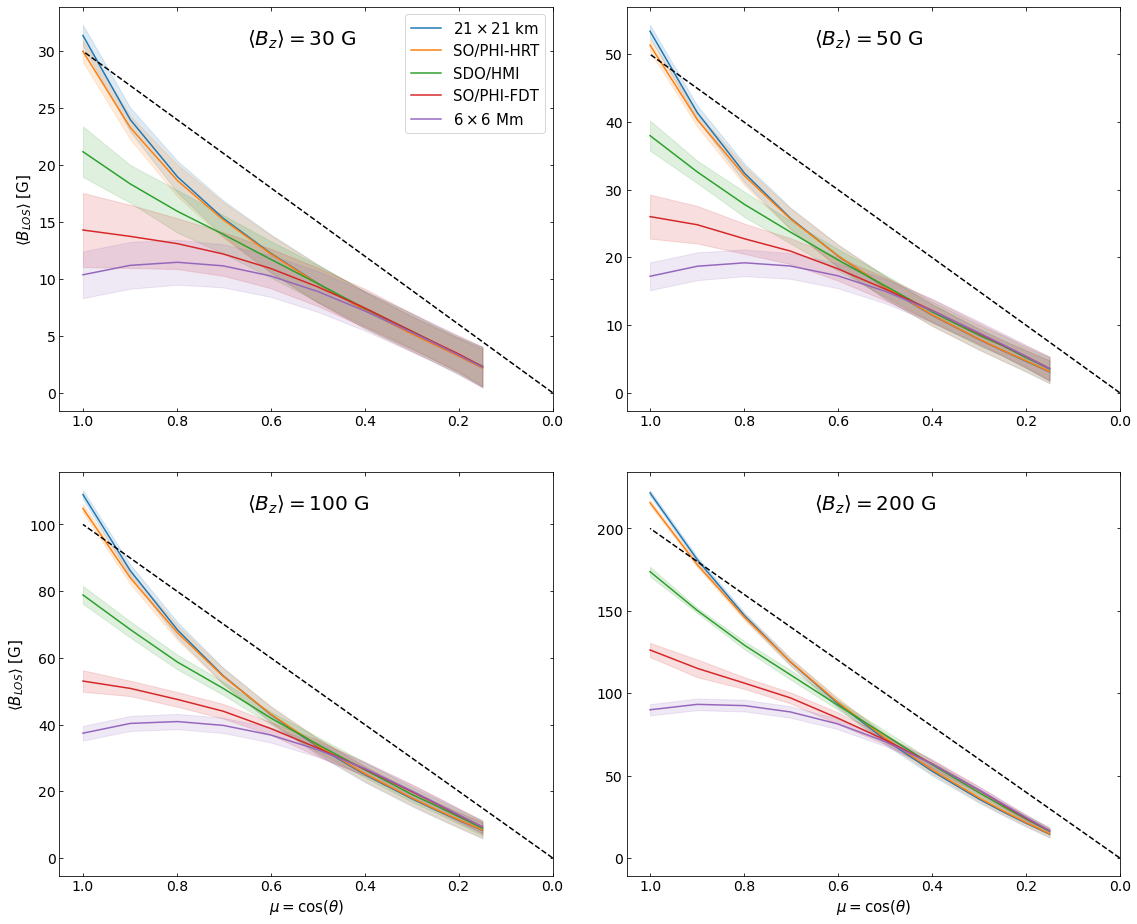

In [20]:
%matplotlib inline

fig = plt.figure(figsize = (19,16))
gs = fig.add_gridspec(2, 2, wspace=0.15, hspace=0.15, height_ratios = [1,1])

ax_30 = fig.add_subplot(gs[0, 0])
plot_blos_curves(ax_30, plot_MURaM_30, plot_fdt_30, plot_hrt_30, plot_hmi_30, plot_one_30, field_strength='30', xlabel=None, ylabel=True, mu_lim=11, shaded_err=True, plt_legend=True)
y = 0.9*ax_30.get_ylim()[1]
ax_30.tick_params(top=True, bottom=True, left=True, right=True, labeltop=False, labelbottom=True, direction="in")
ax_30.text(0.65,y,r"$\langle B_z \rangle = 30$ G", fontsize=20)

ax_50 = fig.add_subplot(gs[0, 1])
plot_blos_curves(ax_50, plot_MURaM_50, plot_fdt_50, plot_hrt_50, plot_hmi_50, plot_one_50, field_strength = '50', xlabel = None, ylabel = None, mu_lim=11, shaded_err = True)
y = 0.9*ax_50.get_ylim()[1]
ax_50.tick_params(top=True, bottom=True, left=True, right=True, labeltop=False, labelbottom=True, direction="in")
ax_50.text(0.65,y,r"$\langle B_z \rangle = 50$ G", fontsize=20)

ax_100 = fig.add_subplot(gs[1, 0])
plot_blos_curves(ax_100, plot_MURaM_100, plot_fdt_100, plot_hrt_100, plot_hmi_100, plot_one_100, field_strength = '100', xlabel = True, ylabel = True, mu_lim=11, shaded_err = True)
y = 0.9*ax_100.get_ylim()[1]
ax_100.tick_params(top=True, bottom=True, left=True, right=True, labeltop=False, labelbottom=True, direction="in")
ax_100.text(0.65,y,r"$\langle B_z \rangle = 100$ G", fontsize=20)

# ax_120 = fig.add_subplot(gs[1, 1])
# plot_blos_curves(ax_120, plot_MURaM_120, plot_fdt_120, plot_hrt_120, plot_hmi_120, plot_one_120, field_strength = '120', xlabel = True, ylabel = True)
# y = 0.9*ax_120.get_ylim()[1]
# ax_120.text(0.65,y,r"$\langle B_z \rangle = 120$ G", fontsize=20)

ax_200 = fig.add_subplot(gs[1, 1])
plot_blos_curves(ax_200, plot_MURaM_200, plot_fdt_200, plot_hrt_200, plot_hmi_200, plot_one_200, field_strength = '200', xlabel = True, ylabel = None, mu_lim=11, shaded_err = True)
y = 0.9*ax_200.get_ylim()[1]
ax_200.tick_params(top=True, bottom=True, left=True, right=True, labeltop=False, labelbottom=True, direction="in")
ax_200.text(0.65,y,r"$\langle B_z \rangle = 200$ G", fontsize=20)
plt.savefig('./plots/6173_blos_clv_qu_1551_50iter_ticks.png', bbox_inches='tight', dpi=300)
plt.tight_layout()
plt.show()

/home/sinjan/.conda/envs/dataproc/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


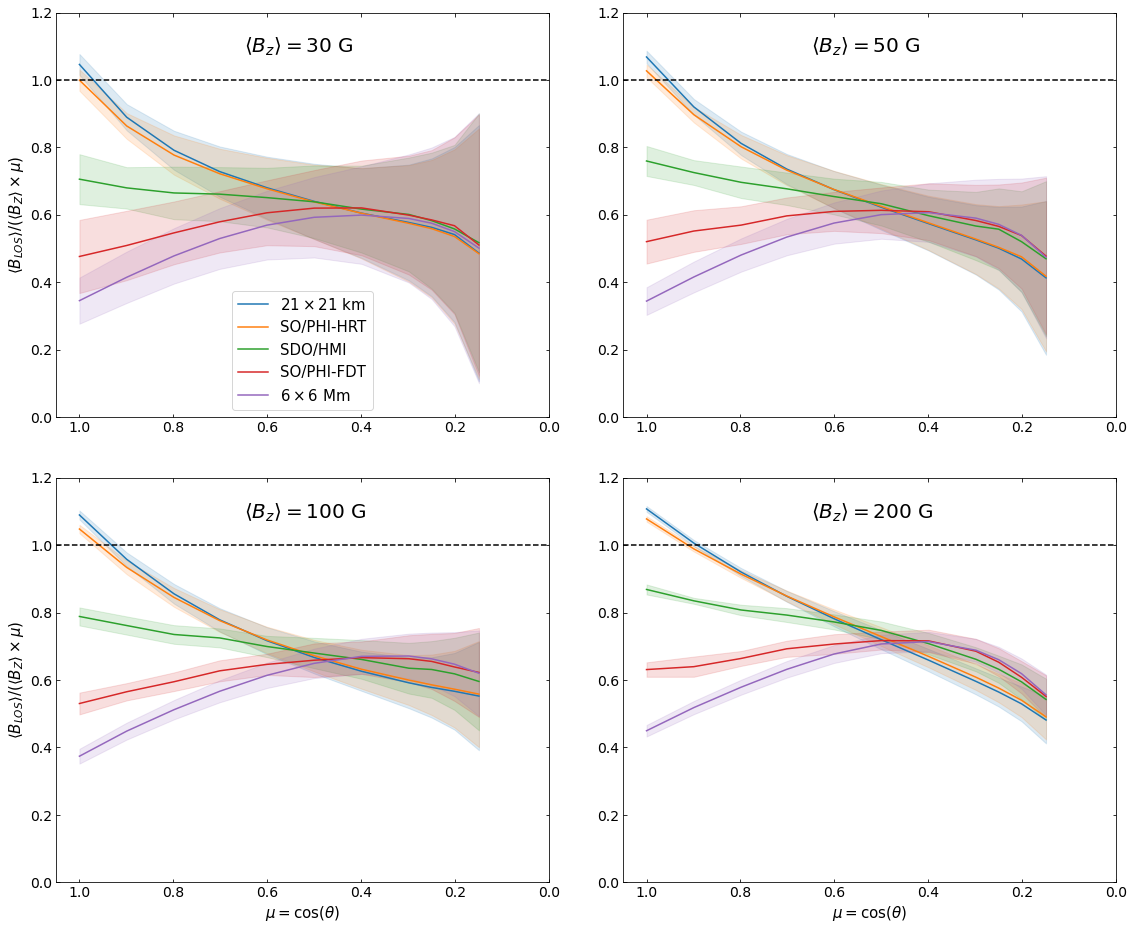

In [22]:
%matplotlib inline

fig = plt.figure(figsize = (19,16))
gs = fig.add_gridspec(2, 2, wspace=0.15, hspace=0.15, height_ratios = [1,1])

ax_30 = fig.add_subplot(gs[0, 0])
plot_blos_curves(ax_30, plot_MURaM_30, plot_fdt_30, plot_hrt_30, plot_hmi_30, plot_one_30, field_strength = '30', xlabel = None, ylabel = True, mu_lim=11, shaded_err = True, div_by_exp = True, plt_legend=True)
y = 0.9*ax_30.get_ylim()[1]
ax_30.tick_params(top=True, bottom=True, left=True, right=True, labeltop=False, labelbottom=True, direction="in")
ax_30.text(0.65,y,r"$\langle B_z \rangle = 30$ G", fontsize=20)

ax_50 = fig.add_subplot(gs[0, 1])
plot_blos_curves(ax_50, plot_MURaM_50, plot_fdt_50, plot_hrt_50, plot_hmi_50, plot_one_50, field_strength = '50', xlabel = None, ylabel = None, mu_lim=11, shaded_err = True, div_by_exp = True)
y = 0.9*ax_50.get_ylim()[1]
ax_50.tick_params(top=True, bottom=True, left=True, right=True, labeltop=False, labelbottom=True, direction="in")
ax_50.text(0.65,y,r"$\langle B_z \rangle = 50$ G", fontsize=20)

ax_100 = fig.add_subplot(gs[1, 0])
plot_blos_curves(ax_100, plot_MURaM_100, plot_fdt_100, plot_hrt_100, plot_hmi_100, plot_one_100, field_strength = '100', xlabel = True, ylabel = True, mu_lim=11, shaded_err = True, div_by_exp = True)
y = 0.9*ax_100.get_ylim()[1]
ax_100.tick_params(top=True, bottom=True, left=True, right=True, labeltop=False, labelbottom=True, direction="in")
ax_100.text(0.65,y,r"$\langle B_z \rangle = 100$ G", fontsize=20)

ax_200 = fig.add_subplot(gs[1, 1])
plot_blos_curves(ax_200, plot_MURaM_200, plot_fdt_200, plot_hrt_200, plot_hmi_200, plot_one_200, field_strength = '200', xlabel = True, ylabel = None, mu_lim=11, shaded_err = True, div_by_exp = True)
y = 0.9*ax_200.get_ylim()[1]
ax_200.tick_params(top=True, bottom=True, left=True, right=True, labeltop=False, labelbottom=True, direction="in")
ax_200.text(0.65,y,r"$\langle B_z \rangle = 200$ G", fontsize=20)

plt.tight_layout()
plt.savefig('./plots/6173_blos_clv_frac_qu_1551_50iter_ticks.png', bbox_inches='tight', dpi=300)
plt.show()

# 5250

In [23]:
#load one results
with open(r"./blos_pickles/cmilosqu_200_5250_onepix_pixels_pos_neg_035_1551_50iter.pickle", "rb") as output_file:
    res_5250_one_200 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilosqu_120_5250_onepix_pixels_pos_neg_035_1551_50iter.pickle", "rb") as output_file:
    res_5250_one_120 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilosqu_100_5250_onepix_pixels_pos_neg_035_1551_50iter.pickle", "rb") as output_file:
    res_5250_one_100 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilosqu_50_5250_onepix_pixels_pos_neg_035_1551_50iter.pickle", "rb") as output_file:
    res_5250_one_50 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilosqu_30_5250_onepix_pixels_pos_neg_035_1551_50iter.pickle", "rb") as output_file:
    res_5250_one_30 = cPickle.load(output_file)
    
#res_5250_one_200a,res_5250_one_120a,res_5250_one_100a,res_5250_one_50a,res_5250_one_30a = avg_pos_neg(res_5250_one_200,res_5250_one_120,res_5250_one_100,res_5250_one_50,res_5250_one_30)

In [24]:
plot_5250_one_200,plot_5250_one_120,plot_5250_one_100,plot_5250_one_50,plot_5250_one_30 = get_corr_avg_std_of_pos_neg(res_5250_one_200,res_5250_one_120,res_5250_one_100,res_5250_one_50,res_5250_one_30,std_err = False)

In [25]:
#load hmi results
with open(r"./blos_pickles/cmilosqu_200_5250_HMI_pixels_pos_neg_035_1551_50iter.pickle", "rb") as output_file:
    res_5250_hmi_200 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilosqu_120_5250_HMI_pixels_pos_neg_035_1551_50iter.pickle", "rb") as output_file:
    res_5250_hmi_120 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilosqu_100_5250_HMI_pixels_pos_neg_035_1551_50iter.pickle", "rb") as output_file:
    res_5250_hmi_100 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilosqu_50_5250_HMI_pixels_pos_neg_035_1551_50iter.pickle", "rb") as output_file:
    res_5250_hmi_50 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilosqu_30_5250_HMI_pixels_pos_neg_035_1551_50iter.pickle", "rb") as output_file:
    res_5250_hmi_30 = cPickle.load(output_file)
    
#res_5250_hmi_200a,res_5250_hmi_120a,res_5250_hmi_100a,res_5250_hmi_50a,res_5250_hmi_30a = avg_pos_neg(res_5250_hmi_200,res_5250_hmi_120,res_5250_hmi_100,res_5250_hmi_50,res_5250_hmi_30)

In [26]:
plot_5250_hmi_200,plot_5250_hmi_120,plot_5250_hmi_100,plot_5250_hmi_50,plot_5250_hmi_30 = get_corr_avg_std_of_pos_neg(res_5250_hmi_200,res_5250_hmi_120,res_5250_hmi_100,res_5250_hmi_50,res_5250_hmi_30,std_err = False)

In [27]:
#load fdt results
with open(r"./blos_pickles/cmilosqu_200_5250_FDT_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_5250_fdt_200 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilosqu_120_5250_FDT_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_5250_fdt_120 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilosqu_100_5250_FDT_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_5250_fdt_100 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilosqu_50_5250_FDT_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_5250_fdt_50 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilosqu_30_5250_FDT_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_5250_fdt_30 = cPickle.load(output_file)
    
#res_5250_fdt_200a,res_5250_fdt_120a,res_5250_fdt_100a,res_5250_fdt_50a,res_5250_fdt_30a = avg_pos_neg(res_5250_fdt_200,res_5250_fdt_120,res_5250_fdt_100,res_5250_fdt_50,res_5250_fdt_30)

In [28]:
plot_5250_fdt_200,plot_5250_fdt_120,plot_5250_fdt_100,plot_5250_fdt_50,plot_5250_fdt_30 = get_corr_avg_std_of_pos_neg(res_5250_fdt_200,res_5250_fdt_120,res_5250_fdt_100,res_5250_fdt_50,res_5250_fdt_30,std_err = False)

In [29]:
#load hrt results
with open(r"./blos_pickles/cmilosqu_200_5250_HRT_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_5250_hrt_200 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilosqu_120_5250_HRT_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_5250_hrt_120 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilosqu_100_5250_HRT_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_5250_hrt_100 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilosqu_50_5250_HRT_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_5250_hrt_50 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilosqu_30_5250_HRT_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_5250_hrt_30 = cPickle.load(output_file)
    
#res_5250hrt_200a,res_5250hrt_120a,res_5250hrt_100a,res_5250hrt_50a,res_5250hrt_30a = avg_pos_neg(res_5250hrt_200,res_5250hrt_120,res_5250hrt_100,res_5250hrt_50,res_5250hrt_30)

In [30]:
plot_5250_hrt_200,plot_5250_hrt_120,plot_5250_hrt_100,plot_5250_hrt_50,plot_5250_hrt_30 = get_corr_avg_std_of_pos_neg(res_5250_hrt_200,res_5250_hrt_120,res_5250_hrt_100,res_5250_hrt_50,res_5250_hrt_30,std_err = False)

In [31]:
#load MURaM results
with open(r"./blos_pickles/cmilosqu_200_5250_MURaM_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_5250_MURaM_200 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilosqu_120_5250_MURaM_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_5250_MURaM_120 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilosqu_100_5250_MURaM_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_5250_MURaM_100 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilosqu_50_5250_MURaM_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_5250_MURaM_50 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cmilosqu_30_5250_MURaM_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_5250_MURaM_30 = cPickle.load(output_file)

In [32]:
plot_5250_MURaM_200,plot_5250_MURaM_120,plot_5250_MURaM_100,plot_5250_MURaM_50,plot_5250_MURaM_30 = get_corr_avg_std_of_pos_neg(res_5250_MURaM_200,res_5250_MURaM_120,res_5250_MURaM_100,res_5250_MURaM_50,res_5250_MURaM_30,std_err = False)

# 5250 CLV Blos curves

/home/sinjan/.conda/envs/dataproc/lib/python3.7/site-packages/ipykernel_launcher.py:31: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


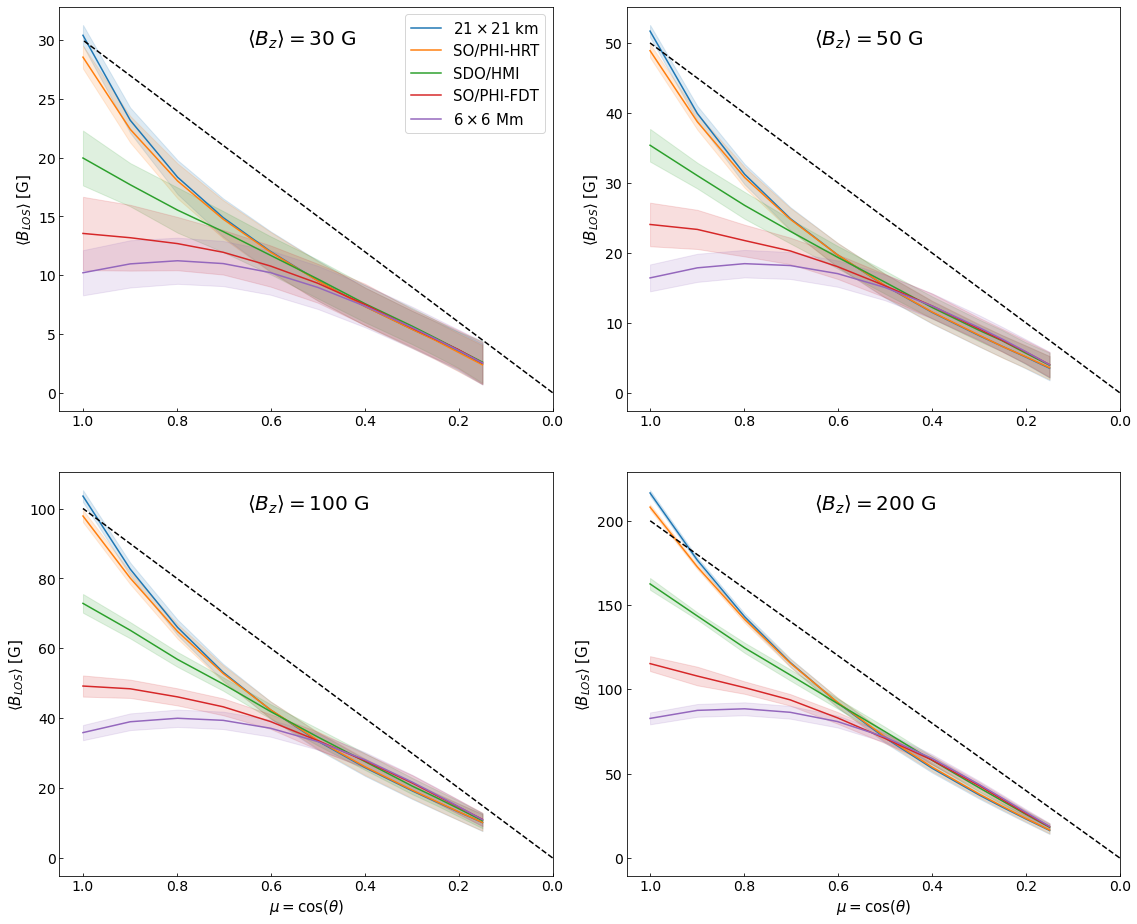

In [15]:
%matplotlib inline

fig = plt.figure(figsize = (19,16))
gs = fig.add_gridspec(2, 2, wspace=0.15, hspace=0.15, height_ratios = [1,1])

ax_30 = fig.add_subplot(gs[0, 0])
plot_blos_curves(ax_30, plot_5250_MURaM_30, plot_5250_fdt_30, plot_5250_hrt_30, plot_5250_hmi_30, plot_5250_one_30, field_strength = '30', xlabel = None, ylabel = True, mu_lim=11, shaded_err = True, plt_legend=True)
y = 0.9*ax_30.get_ylim()[1]
ax_30.text(0.65,y,r"$\langle B_z \rangle = 30$ G", fontsize=20)

ax_50 = fig.add_subplot(gs[0, 1])
plot_blos_curves(ax_50, plot_5250_MURaM_50, plot_5250_fdt_50, plot_5250_hrt_50, plot_5250_hmi_50, plot_5250_one_50, field_strength = '50', xlabel = None, ylabel = True, mu_lim=11, shaded_err = True)
y = 0.9*ax_50.get_ylim()[1]
ax_50.text(0.65,y,r"$\langle B_z \rangle = 50$ G", fontsize=20)

ax_100 = fig.add_subplot(gs[1, 0])
plot_blos_curves(ax_100, plot_5250_MURaM_100, plot_5250_fdt_100, plot_5250_hrt_100, plot_5250_hmi_100, plot_5250_one_100, field_strength = '100', xlabel = True, ylabel = True, mu_lim=11, shaded_err = True)
y = 0.9*ax_100.get_ylim()[1]
ax_100.text(0.65,y,r"$\langle B_z \rangle = 100$ G", fontsize=20)

# ax_120 = fig.add_subplot(gs[1, 1])
# plot_blos_curves(ax_120, plot_5250_MURaM_120, plot_5250_fdt_120, plot_5250_hrt_120, plot_5250_hmi_120, plot_5250_one_120, field_strength = '120', xlabel = True, ylabel = True)
# y = 0.9*ax_120.get_ylim()[1]
# ax_120.text(0.65,y,r"$\langle B_z \rangle = 120$ G", fontsize=20)

ax_200 = fig.add_subplot(gs[1, 1])
plot_blos_curves(ax_200, plot_5250_MURaM_200, plot_5250_fdt_200, plot_5250_hrt_200, plot_5250_hmi_200, plot_5250_one_200, field_strength = '200', xlabel = True, ylabel = True, mu_lim=11, shaded_err = True)
y = 0.9*ax_200.get_ylim()[1]
ax_200.text(0.65,y,r"$\langle B_z \rangle = 200$ G", fontsize=20)

plt.tight_layout()
plt.show()

# Differences

In [33]:
def calc_diff_err(plot_6173, plot_5250):
    #sigma_diff**2 = (1/6173)**2 * sigma_5250**2 + (-1/6173**2)**2 * sigma_6173**2
    arr_6173 = np.stack(plot_6173) #shape(5,2,13)
    arr_5250 = np.stack(plot_5250) 
    print(arr_6173.shape)
    print(arr_5250.shape)
    err = np.sqrt((1/arr_6173[:,0,:])**2*arr_5250[:,1,:]**2 + (arr_5250[:,0,:]/arr_6173[:,0,:]**2)**2*arr_6173[:,1,:]**2)
    return err

In [38]:
calc_diff_err([plot_MURaM_30, plot_fdt_30, plot_hrt_30, plot_hmi_30, plot_one_30], [plot_5250_MURaM_30, plot_5250_fdt_30, plot_5250_hrt_30, plot_5250_hmi_30, plot_5250_one_30])

(5, 2, 13)
(5, 2, 13)


array([[ 0.04199109,  0.06308676,  0.10453818,  0.14671939,  0.19475756,
         0.25037926,  0.3185343 ,  0.43898243,  0.54710356,  0.73042604,
         1.2142829 ,  2.78370456, 19.51811311],
       [ 0.31429112,  0.28526695,  0.23760553,  0.21713191,  0.228173  ,
         0.25463354,  0.32809675,  0.43691174,  0.52654341,  0.69880559,
         1.17534519,  2.45975028, 21.09640269],
       [ 0.04387427,  0.06600716,  0.10830173,  0.14787148,  0.19454222,
         0.24772403,  0.31737467,  0.43992173,  0.54488605,  0.72379273,
         1.17347249,  2.69505534, 16.01075615],
       [ 0.15129886,  0.13548225,  0.16776246,  0.17150497,  0.19090726,
         0.24114963,  0.30264685,  0.4136114 ,  0.50993346,  0.67604577,
         1.14137138,  2.44391584, 11.50514154],
       [ 0.27441845,  0.25488457,  0.24131643,  0.24347101,  0.26564709,
         0.29982962,  0.3583553 ,  0.47546638,  0.58305329,  0.76445759,
         1.23479248,  2.52082732, 19.57579244]])

In [34]:
# 5250 diff plots

def plot_blos_diff_curves(ax, plot_6173, plot_5250, field_strength='30',xlabel = None, \
                          ylabel = r"$(\langle B_{LOS}\rangle^{5250}-\langle B_{LOS}\rangle^{6173})/\langle B_{LOS}\rangle^{6173}$", \
                          title=None, errorbar = True, mu_lim=11, percent = False, lloc = "upper right", plt_legend=False,**kwargs):
    mu_vals = [0.0486,0.1007,0.1493,0.2014,0.25,0.2986,0.3993,0.5,0.6007,0.7014,0.7986,0.8993,1.0]
    plot_MURaM = plot_6173[0]
    plot_fdt = plot_6173[1]
    plot_hrt = plot_6173[2]
    plot_hmi = plot_6173[3]
    plot_one = plot_6173[4]
    
    plot_MURaM_5250 = plot_5250[0]
    plot_fdt_5250 = plot_5250[1]
    plot_hrt_5250 = plot_5250[2]
    plot_hmi_5250 = plot_5250[3]
    plot_one_5250 = plot_5250[4]
    
    fs = float(field_strength)
    
    err = calc_diff_err(plot_6173, plot_5250)
    err_muram = err[0,:mu_lim]
    err_hrt = err[2,:mu_lim]
    err_hmi = err[3,:mu_lim]
    err_fdt = err[1,:mu_lim]
    err_one = err[4,:mu_lim]
    
    y_muram = (np.array(plot_MURaM_5250[0][:mu_lim])-np.array(plot_MURaM[0][:mu_lim]))/np.array(plot_MURaM[0][:mu_lim])
    y_hrt = (np.array(plot_hrt_5250[0][:mu_lim])-np.array(plot_hrt[0][:mu_lim]))/np.array(plot_hrt[0][:mu_lim])
    y_hmi = (np.array(plot_hmi_5250[0][:mu_lim])-np.array(plot_hmi[0][:mu_lim]))/np.array(plot_hmi[0][:mu_lim])
    y_fdt = (np.array(plot_fdt_5250[0][:mu_lim])-np.array(plot_fdt[0][:mu_lim]))/np.array(plot_fdt[0][:mu_lim])
    y_one = (np.array(plot_one_5250[0][:mu_lim])-np.array(plot_one[0][:mu_lim]))/np.array(plot_one[0][:mu_lim])
    
    if percent:
        y_muram*=100
        y_hrt*=100
        y_hmi*=100
        y_fdt*=100
        y_one*=100
        
        err_muram*=100 
        err_hrt*=100
        err_hmi*=100
        err_fdt*=100
        err_one*=100
        
    x = mu_vals[::-1][:mu_lim]
    
    if errorbar:
        ax.errorbar(x, y_muram, yerr = err_muram ,label = r'$21\times 21$ km')
        ax.errorbar(x, y_hrt, yerr = err_hrt, label = 'SO/PHI-HRT')
        ax.errorbar(x, y_hmi, yerr = err_hmi, label = 'SDO/HMI')
        ax.errorbar(x, y_fdt, yerr = err_fdt, label = 'SO/PHI-FDT')
        ax.errorbar(x, y_one, yerr = err_one, label = r'$6\times 6$ Mm')
    if not errorbar:
        #default plot cycle [u'#1f77b4', u'#ff7f0e', u'#2ca02c', u'#d62728', u'#9467bd', u'#8c564b', u'#e377c2', u'#7f7f7f', u'#bcbd22', u'#17becf']
        ax.plot(x, y_muram, label = r'$21\times 21$ km')
        ax.fill_between(x, y_muram-err_muram, y_muram+err_muram, color=u'#1f77b4', alpha=0.2)
        ax.plot(x, y_hrt, label = 'SO/PHI-HRT')
        ax.fill_between(x, y_hrt-err_hrt, y_hrt+err_hrt, color=u'#ff7f0e', alpha=0.2)
        ax.plot(x, y_hmi, label = 'SDO/HMI')
        ax.fill_between(x, y_hmi-err_hmi, y_hmi+err_hmi, color=u'#2ca02c', alpha=0.2)
        ax.plot(x, y_fdt, label = 'SO/PHI-FDT')
        ax.fill_between(x, y_fdt-err_fdt, y_fdt+err_fdt, color=u'#d62728', alpha=0.2)
        ax.plot(x, y_one,  label = r'$6\times 6$ Mm')
        ax.fill_between(x, y_one-err_one, y_one+err_one, color=u'#9467bd', alpha=0.2)
    if title is not None:
        ax.set_title(f"{title}")
    if plt_legend:
        plt.legend(loc=lloc,fontsize=15)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    ax.set_xlim(1.05,0)
    
    if xlabel is not None:
        ax.set_xlabel(r"$\mu=\cos(\theta)$", fontsize=15)
    if ylabel is not None:
        ax.set_ylabel(ylabel, fontsize=15)

# 5250 - 6173 diff

(5, 2, 13)
(5, 2, 13)
(5, 2, 13)
(5, 2, 13)
(5, 2, 13)
(5, 2, 13)
(5, 2, 13)
(5, 2, 13)


/home/sinjan/.conda/envs/dataproc/lib/python3.7/site-packages/ipykernel_launcher.py:50: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


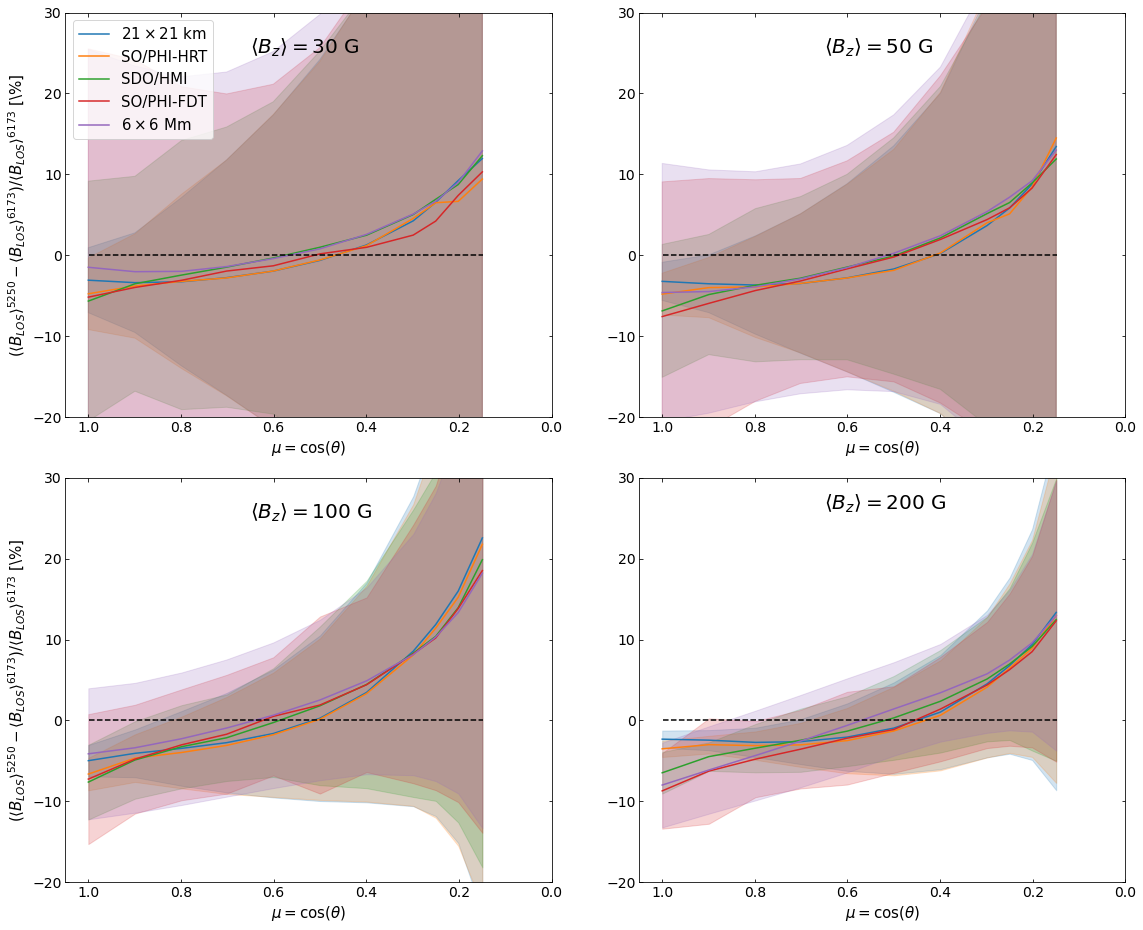

In [36]:
fig = plt.figure(figsize = (19,16))
gs = fig.add_gridspec(2, 2, wspace=0.18, hspace=0.15)
maxl = 30
minl = -20
ax_30r = fig.add_subplot(gs[0, 0])
plot_blos_diff_curves(ax_30r, [plot_MURaM_30, plot_fdt_30, plot_hrt_30, plot_hmi_30, plot_one_30], \
                      [plot_5250_MURaM_30, plot_5250_fdt_30, plot_5250_hrt_30, plot_5250_hmi_30, plot_5250_one_30], \
                      field_strength = '30', xlabel = True, \
                      ylabel = r"$(\langle B_{LOS}\rangle^{5250}-\langle B_{LOS}\rangle^{6173})/\langle B_{LOS}\rangle^{6173}$ [\%]", \
                      errorbar=False, percent=True, lloc = "upper left", plt_legend=True)
plt.ylim(minl,maxl)
y = 0.83*ax_30r.get_ylim()[1]
ax_30r.tick_params(top=True, bottom=True, left=True, right=True, labeltop=False, labelbottom=True, direction="in")
ax_30r.axhline(y=0,xmin=0.05,xmax=0.86,color='black',linestyle='--')
ax_30r.text(0.65,y,r"$\langle B_z \rangle = 30$ G", fontsize=20)

ax_50r = fig.add_subplot(gs[0, 1])
plot_blos_diff_curves(ax_50r, [plot_MURaM_50, plot_fdt_50, plot_hrt_50, plot_hmi_50, plot_one_50], [plot_5250_MURaM_50, plot_5250_fdt_50, plot_5250_hrt_50, plot_5250_hmi_50, plot_5250_one_50], \
                      field_strength = '50', xlabel = True, \
                      ylabel = None, \
                      errorbar=False, percent=True, lloc = "upper left", plt_legend=False)
plt.ylim(minl,maxl)
y = 0.83*ax_50r.get_ylim()[1]
ax_50r.tick_params(top=True, bottom=True, left=True, right=True, labeltop=False, labelbottom=True, direction="in")
ax_50r.axhline(y=0,xmin=0.05,xmax=0.86,color='black',linestyle='--')
ax_50r.text(0.65,y,r"$\langle B_z \rangle = 50$ G", fontsize=20)

ax_100r = fig.add_subplot(gs[1, 0])
plot_blos_diff_curves(ax_100r, [plot_MURaM_100, plot_fdt_100, plot_hrt_100, plot_hmi_100, plot_one_100], \
                      [plot_5250_MURaM_100, plot_5250_fdt_100, plot_5250_hrt_100, plot_5250_hmi_100, plot_5250_one_100], \
                      field_strength = '100', xlabel = True, \
                      ylabel = r"$(\langle B_{LOS}\rangle^{5250}-\langle B_{LOS}\rangle^{6173})/\langle B_{LOS}\rangle^{6173}$ [\%]", \
                      errorbar=False, percent=True, lloc = "upper left", plt_legend=False)
plt.ylim(minl,maxl)
y = 0.83*ax_100r.get_ylim()[1]
ax_100r.tick_params(top=True, bottom=True, left=True, right=True, labeltop=False, labelbottom=True, direction="in")
ax_100r.axhline(y=0,xmin=0.05,xmax=0.86,color='black',linestyle='--')
ax_100r.text(0.65,y,r"$\langle B_z \rangle = 100$ G", fontsize=20)

ax_200r = fig.add_subplot(gs[1, 1])
plot_blos_diff_curves(ax_200r, [plot_MURaM_200, plot_fdt_200, plot_hrt_200, plot_hmi_200, plot_one_200], [plot_5250_MURaM_200, plot_5250_fdt_200, plot_5250_hrt_200, plot_5250_hmi_200, plot_5250_one_200], \
                      field_strength = '200', xlabel = True, ylabel = None, errorbar=False, percent=True, lloc = "upper left")
#ax_200.set_ylim(ax_30.get_ylim()[0],ax_30.get_ylim()[1])
plt.ylim(minl,maxl)
y = 0.87*ax_200r.get_ylim()[1]
ax_200r.tick_params(top=True, bottom=True, left=True, right=True, labeltop=False, labelbottom=True, direction="in")
ax_200r.axhline(y=0,xmin=0.05,xmax=0.86,color='black',linestyle='--')
ax_200r.text(0.65,y,r"$\langle B_z \rangle = 200$ G", fontsize=20)

plt.tight_layout()
plt.savefig('./plots/5250_6173_diff_clv_blos_lims_4panels_qu_1551_50iter_ticks.png', dpi=300, bbox_inches='tight', transparent=False)
plt.show()

In [42]:
(np.array(plot_5250_MURaM_200)-np.array(plot_MURaM_200))/np.array(plot_MURaM_200)*100

array([[-1.75142658, -1.62196119, -1.47747636, -1.39439845, -1.1208141 ,
        -0.3014939 ,  1.57973915,  4.96851433,  7.24050463,  9.89362561,
        13.75807743, 19.92881872, 46.92796814],
       [ 0.39696884, -4.39245194, -1.1118961 ,  6.81374089,  7.05443278,
         4.43756509, -1.95674027, -4.93793112, -3.34361196, -0.79198522,
         2.22371054,  2.90517715, -0.66667965]])

# 6173 MDI

In [37]:
#load one pixel results
with open(r"./blos_pickles/mdi_200_6173_onepix_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_one_200 = cPickle.load(output_file)
    
with open(r"./blos_pickles/mdi_120_6173_onepix_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_one_120 = cPickle.load(output_file)
    
with open(r"./blos_pickles/mdi_100_6173_onepix_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_one_100 = cPickle.load(output_file)
    
with open(r"./blos_pickles/mdi_50_6173_onepix_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_one_50 = cPickle.load(output_file)
    
with open(r"./blos_pickles/mdi_30_6173_onepix_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_one_30 = cPickle.load(output_file)

In [38]:
plot_MDI_one_200,plot_MDI_one_120,plot_MDI_one_100,plot_MDI_one_50,plot_MDI_one_30 = get_corr_avg_std_of_pos_neg(res_one_200,res_one_120,res_one_100,res_one_50,res_one_30,std_err = False)

In [39]:
#load hmi results
with open(r"./blos_pickles/mdi_200_6173_HMI_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_hmi_200 = cPickle.load(output_file)
    
with open(r"./blos_pickles/mdi_120_6173_HMI_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_hmi_120 = cPickle.load(output_file)
    
with open(r"./blos_pickles/mdi_100_6173_HMI_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_hmi_100 = cPickle.load(output_file)
    
with open(r"./blos_pickles/mdi_50_6173_HMI_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_hmi_50 = cPickle.load(output_file)
    
with open(r"./blos_pickles/mdi_30_6173_HMI_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_hmi_30 = cPickle.load(output_file)
    
#res_hmi_200a,res_hmi_120a,res_hmi_100a,res_hmi_50a,res_hmi_30a = avg_pos_neg(res_hmi_200,res_hmi_120,res_hmi_100,res_hmi_50,res_hmi_30)

In [40]:
plot_MDI_hmi_200,plot_MDI_hmi_120,plot_MDI_hmi_100,plot_MDI_hmi_50,plot_MDI_hmi_30 = get_corr_avg_std_of_pos_neg(res_hmi_200,res_hmi_120,res_hmi_100,res_hmi_50,res_hmi_30,std_err = False)

In [41]:
#load fdt results
with open(r"./blos_pickles/mdi_200_6173_FDT_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_fdt_200 = cPickle.load(output_file)
    
with open(r"./blos_pickles/mdi_120_6173_FDT_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_fdt_120 = cPickle.load(output_file)
    
with open(r"./blos_pickles/mdi_100_6173_FDT_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_fdt_100 = cPickle.load(output_file)
    
with open(r"./blos_pickles/mdi_50_6173_FDT_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_fdt_50 = cPickle.load(output_file)
    
with open(r"./blos_pickles/mdi_30_6173_FDT_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_fdt_30 = cPickle.load(output_file)
    
#res_fdt_200a,res_fdt_120a,res_fdt_100a,res_fdt_50a,res_fdt_30a = avg_pos_neg(res_fdt_200,res_fdt_120,res_fdt_100,res_fdt_50,res_fdt_30)

In [42]:
plot_MDI_fdt_200,plot_MDI_fdt_120,plot_MDI_fdt_100,plot_MDI_fdt_50,plot_MDI_fdt_30 = get_corr_avg_std_of_pos_neg(res_fdt_200,res_fdt_120,res_fdt_100,res_fdt_50,res_fdt_30,std_err = False)

In [43]:
#load hrt results
with open(r"./blos_pickles/mdi_200_6173_HRT_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_hrt_200 = cPickle.load(output_file)
    
with open(r"./blos_pickles/mdi_120_6173_HRT_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_hrt_120 = cPickle.load(output_file)
    
with open(r"./blos_pickles/mdi_100_6173_HRT_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_hrt_100 = cPickle.load(output_file)
    
with open(r"./blos_pickles/mdi_50_6173_HRT_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_hrt_50 = cPickle.load(output_file)
    
with open(r"./blos_pickles/mdi_30_6173_HRT_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_hrt_30 = cPickle.load(output_file)
    
#res_hrt_200a,res_hrt_120a,res_hrt_100a,res_hrt_50a,res_hrt_30a = avg_pos_neg(res_hrt_200,res_hrt_120,res_hrt_100,res_hrt_50,res_hrt_30)

In [44]:
plot_MDI_hrt_200,plot_MDI_hrt_120,plot_MDI_hrt_100,plot_MDI_hrt_50,plot_MDI_hrt_30 = get_corr_avg_std_of_pos_neg(res_hrt_200,res_hrt_120,res_hrt_100,res_hrt_50,res_hrt_30,std_err = False)

In [45]:
#load MURaM results
with open(r"./blos_pickles/mdi_200_6173_MURaM_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_MURaM_200 = cPickle.load(output_file)
    
with open(r"./blos_pickles/mdi_120_6173_MURaM_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_MURaM_120 = cPickle.load(output_file)
    
with open(r"./blos_pickles/mdi_100_6173_MURaM_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_MURaM_100 = cPickle.load(output_file)
    
with open(r"./blos_pickles/mdi_50_6173_MURaM_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_MURaM_50 = cPickle.load(output_file)
    
with open(r"./blos_pickles/mdi_30_6173_MURaM_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_MURaM_30 = cPickle.load(output_file)

In [46]:
plot_MDI_MURaM_200,plot_MDI_MURaM_120,plot_MDI_MURaM_100,plot_MDI_MURaM_50,plot_MDI_MURaM_30 = get_corr_avg_std_of_pos_neg(res_MURaM_200,res_MURaM_120,res_MURaM_100,res_MURaM_50,res_MURaM_30,std_err = False)

(5, 2, 13)
(5, 2, 13)
(5, 2, 13)
(5, 2, 13)
(5, 2, 13)
(5, 2, 13)
(5, 2, 13)
(5, 2, 13)


/home/sinjan/.conda/envs/dataproc/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


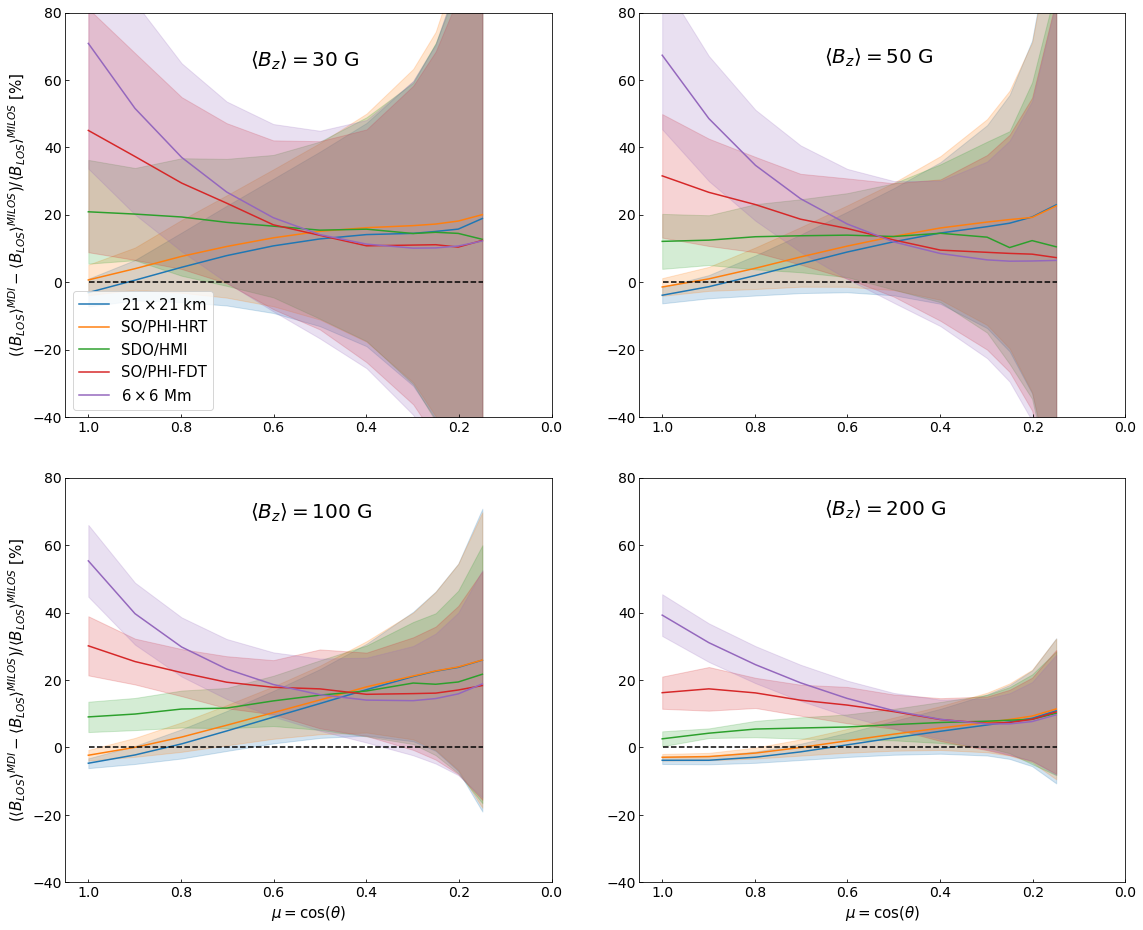

In [98]:
%matplotlib inline

fig = plt.figure(figsize = (19,16))
gs = fig.add_gridspec(2, 2, wspace=0.18, hspace=0.15, height_ratios = [1,1])

ax_30 = fig.add_subplot(gs[0, 0])
plot_blos_diff_curves(ax_30, [plot_MURaM_30, plot_fdt_30, plot_hrt_30, plot_hmi_30, plot_one_30], \
                      [plot_MDI_MURaM_30, plot_MDI_fdt_30, plot_MDI_hrt_30, plot_MDI_hmi_30, plot_MDI_one_30], \
                      field_strength = '30', xlabel = None, \
                      ylabel = r"$(\langle B_{LOS}\rangle^{MDI}-\langle B_{LOS}\rangle^{MILOS})/\langle B_{LOS}\rangle^{MILOS}$ [%]", \
                      errorbar=False, percent=True, lloc = "lower left", plt_legend=True)
plt.ylim(-40,80)
ax_30.axhline(y=0,xmin=0.05,xmax=0.86,color='black',linestyle='--')
y = 0.8*ax_30.get_ylim()[1]
ax_30.text(0.65,y,r"$\langle B_z \rangle = 30$ G", fontsize=20)

ax_50 = fig.add_subplot(gs[0, 1])
plot_blos_diff_curves(ax_50, [plot_MURaM_50, plot_fdt_50, plot_hrt_50, plot_hmi_50, plot_one_50], \
                      [plot_MDI_MURaM_50, plot_MDI_fdt_50, plot_MDI_hrt_50, plot_MDI_hmi_50, plot_MDI_one_50], \
                      field_strength = '50', xlabel = None, ylabel = None, errorbar=False, percent=True, lloc = "upper center")
plt.ylim(-40,80)
ax_50.axhline(y=0,xmin=0.05,xmax=0.86,color='black',linestyle='--')
y = 0.81*ax_50.get_ylim()[1]
ax_50.text(0.65,y,r"$\langle B_z \rangle = 50$ G", fontsize=20)

ax_100 = fig.add_subplot(gs[1, 0])
plot_blos_diff_curves(ax_100, [plot_MURaM_100, plot_fdt_100, plot_hrt_100, plot_hmi_100, plot_one_100], \
                      [plot_MDI_MURaM_100, plot_MDI_fdt_100, plot_MDI_hrt_100, plot_MDI_hmi_100, plot_MDI_one_100], \
                      field_strength = '100', xlabel = True, \
                      ylabel = r"$(\langle B_{LOS}\rangle^{MDI}-\langle B_{LOS}\rangle^{MILOS})/\langle B_{LOS}\rangle^{MILOS}$ [%]", \
                      errorbar=False, percent=True, lloc = "upper center")
plt.ylim(-40,80)
y = 0.85*ax_100.get_ylim()[1]
ax_100.axhline(y=0,xmin=0.05,xmax=0.86,color='black',linestyle='--')
ax_100.text(0.65,y,r"$\langle B_z \rangle = 100$ G", fontsize=20)

ax_200 = fig.add_subplot(gs[1, 1])
plot_blos_diff_curves(ax_200, [plot_MURaM_200, plot_fdt_200, plot_hrt_200, plot_hmi_200, plot_one_200], \
                      [plot_MDI_MURaM_200, plot_MDI_fdt_200, plot_MDI_hrt_200, plot_MDI_hmi_200, plot_MDI_one_200], \
                      field_strength = '200', xlabel = True, ylabel = None, errorbar=False, percent=True, lloc = "upper center")
plt.ylim(-40,80)
y = 0.86*ax_200.get_ylim()[1]
ax_200.axhline(y=0,xmin=0.05,xmax=0.86,color='black',linestyle='--')
ax_200.text(0.65,y,r"$\langle B_z \rangle = 200$ G", fontsize=20)

plt.tight_layout()
plt.savefig('./plots/milos_mdi_diff_fixed_lims.png', dpi=300, bbox_inches='tight', transparent=False)
plt.show()

# 5250 MDI

In [49]:
#load one pixel results
with open(r"./blos_pickles/mdi_200_5250_onepix_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_one_200 = cPickle.load(output_file)
    
with open(r"./blos_pickles/mdi_120_5250_onepix_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_one_120 = cPickle.load(output_file)
    
with open(r"./blos_pickles/mdi_100_5250_onepix_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_one_100 = cPickle.load(output_file)
    
with open(r"./blos_pickles/mdi_50_5250_onepix_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_one_50 = cPickle.load(output_file)
    
with open(r"./blos_pickles/mdi_30_5250_onepix_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_one_30 = cPickle.load(output_file)

In [50]:
plot_MDI_one_200,plot_MDI_one_120,plot_MDI_one_100,plot_MDI_one_50,plot_MDI_one_30 = get_corr_avg_std_of_pos_neg(res_one_200,res_one_120,res_one_100,res_one_50,res_one_30,std_err = False)

In [51]:
#load hmi results
with open(r"./blos_pickles/mdi_200_5250_HMI_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_hmi_200 = cPickle.load(output_file)
    
with open(r"./blos_pickles/mdi_120_5250_HMI_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_hmi_120 = cPickle.load(output_file)
    
with open(r"./blos_pickles/mdi_100_5250_HMI_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_hmi_100 = cPickle.load(output_file)
    
with open(r"./blos_pickles/mdi_50_5250_HMI_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_hmi_50 = cPickle.load(output_file)
    
with open(r"./blos_pickles/mdi_30_5250_HMI_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_hmi_30 = cPickle.load(output_file)
    
#res_hmi_200a,res_hmi_120a,res_hmi_100a,res_hmi_50a,res_hmi_30a = avg_pos_neg(res_hmi_200,res_hmi_120,res_hmi_100,res_hmi_50,res_hmi_30)

In [52]:
plot_MDI_hmi_200,plot_MDI_hmi_120,plot_MDI_hmi_100,plot_MDI_hmi_50,plot_MDI_hmi_30 = get_corr_avg_std_of_pos_neg(res_hmi_200,res_hmi_120,res_hmi_100,res_hmi_50,res_hmi_30,std_err = False)

In [53]:
#load fdt results
with open(r"./blos_pickles/mdi_200_5250_FDT_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_fdt_200 = cPickle.load(output_file)
    
with open(r"./blos_pickles/mdi_120_5250_FDT_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_fdt_120 = cPickle.load(output_file)
    
with open(r"./blos_pickles/mdi_100_5250_FDT_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_fdt_100 = cPickle.load(output_file)
    
with open(r"./blos_pickles/mdi_50_5250_FDT_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_fdt_50 = cPickle.load(output_file)
    
with open(r"./blos_pickles/mdi_30_5250_FDT_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_fdt_30 = cPickle.load(output_file)
    
#res_fdt_200a,res_fdt_120a,res_fdt_100a,res_fdt_50a,res_fdt_30a = avg_pos_neg(res_fdt_200,res_fdt_120,res_fdt_100,res_fdt_50,res_fdt_30)

In [54]:
plot_MDI_fdt_200,plot_MDI_fdt_120,plot_MDI_fdt_100,plot_MDI_fdt_50,plot_MDI_fdt_30 = get_corr_avg_std_of_pos_neg(res_fdt_200,res_fdt_120,res_fdt_100,res_fdt_50,res_fdt_30,std_err = False)

In [55]:
#load hrt results
with open(r"./blos_pickles/mdi_200_5250_HRT_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_hrt_200 = cPickle.load(output_file)
    
with open(r"./blos_pickles/mdi_120_5250_HRT_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_hrt_120 = cPickle.load(output_file)
    
with open(r"./blos_pickles/mdi_100_5250_HRT_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_hrt_100 = cPickle.load(output_file)
    
with open(r"./blos_pickles/mdi_50_5250_HRT_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_hrt_50 = cPickle.load(output_file)
    
with open(r"./blos_pickles/mdi_30_5250_HRT_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_hrt_30 = cPickle.load(output_file)
    
#res_hrt_200a,res_hrt_120a,res_hrt_100a,res_hrt_50a,res_hrt_30a = avg_pos_neg(res_hrt_200,res_hrt_120,res_hrt_100,res_hrt_50,res_hrt_30)

In [56]:
plot_MDI_hrt_200,plot_MDI_hrt_120,plot_MDI_hrt_100,plot_MDI_hrt_50,plot_MDI_hrt_30 = get_corr_avg_std_of_pos_neg(res_hrt_200,res_hrt_120,res_hrt_100,res_hrt_50,res_hrt_30,std_err = False)

In [57]:
#load MURaM results
with open(r"./blos_pickles/mdi_200_5250_MURaM_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_MURaM_200 = cPickle.load(output_file)
    
with open(r"./blos_pickles/mdi_120_5250_MURaM_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_MURaM_120 = cPickle.load(output_file)
    
with open(r"./blos_pickles/mdi_100_5250_MURaM_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_MURaM_100 = cPickle.load(output_file)
    
with open(r"./blos_pickles/mdi_50_5250_MURaM_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_MURaM_50 = cPickle.load(output_file)
    
with open(r"./blos_pickles/mdi_30_5250_MURaM_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_MURaM_30 = cPickle.load(output_file)

In [58]:
plot_MDI_MURaM_200,plot_MDI_MURaM_120,plot_MDI_MURaM_100,plot_MDI_MURaM_50,plot_MDI_MURaM_30 = get_corr_avg_std_of_pos_neg(res_MURaM_200,res_MURaM_120,res_MURaM_100,res_MURaM_50,res_MURaM_30,std_err = False)

/home/sinjan/.conda/envs/dataproc/lib/python3.7/site-packages/ipykernel_launcher.py:31: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


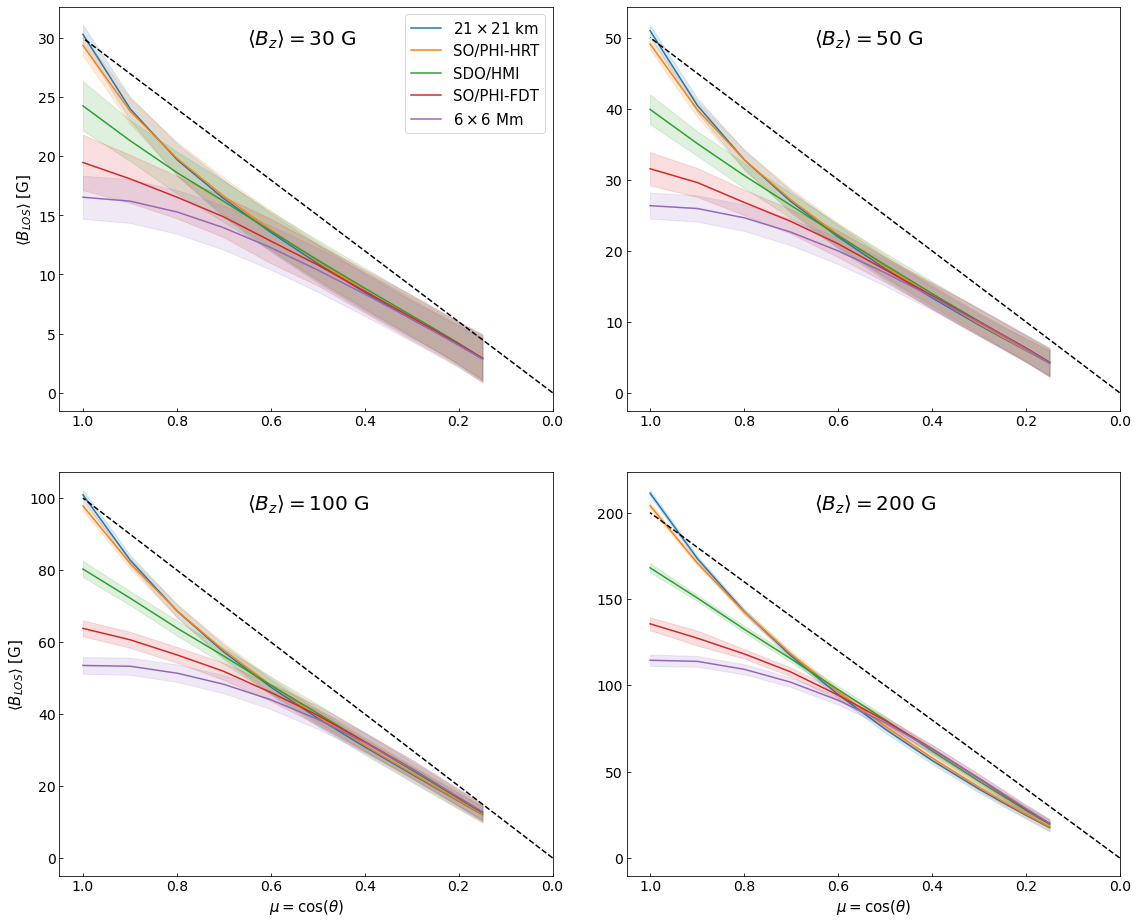

In [48]:
%matplotlib inline
#MDI

fig = plt.figure(figsize = (19,16))
gs = fig.add_gridspec(2, 2, wspace=0.15, hspace=0.15, height_ratios = [1,1])

ax_30 = fig.add_subplot(gs[0, 0])
plot_blos_curves(ax_30, plot_MDI_MURaM_30, plot_MDI_fdt_30, plot_MDI_hrt_30, plot_MDI_hmi_30, plot_MDI_one_30, field_strength = '30', \
                 xlabel = None, ylabel = True, mu_lim=11, shaded_err = True, plt_legend=True)
y = 0.9*ax_30.get_ylim()[1]
ax_30.text(0.65,y,r"$\langle B_z \rangle = 30$ G", fontsize=20)

ax_50 = fig.add_subplot(gs[0, 1])
plot_blos_curves(ax_50, plot_MDI_MURaM_50, plot_MDI_fdt_50, plot_MDI_hrt_50, plot_MDI_hmi_50, plot_MDI_one_50, field_strength = '50', \
                 xlabel = None, ylabel = None, mu_lim=11, shaded_err = True)
y = 0.9*ax_50.get_ylim()[1]
ax_50.text(0.65,y,r"$\langle B_z \rangle = 50$ G", fontsize=20)

ax_100 = fig.add_subplot(gs[1, 0])
plot_blos_curves(ax_100, plot_MDI_MURaM_100, plot_MDI_fdt_100, plot_MDI_hrt_100, plot_MDI_hmi_100, plot_MDI_one_100, field_strength = '100', \
                 xlabel = True, ylabel = True, mu_lim=11, shaded_err = True)
y = 0.9*ax_100.get_ylim()[1]
ax_100.text(0.65,y,r"$\langle B_z \rangle = 100$ G", fontsize=20)

ax_200 = fig.add_subplot(gs[1, 1])
plot_blos_curves(ax_200, plot_MDI_MURaM_200, plot_MDI_fdt_200, plot_MDI_hrt_200, plot_MDI_hmi_200, plot_MDI_one_200, field_strength = '200', \
                 xlabel = True, ylabel = None, mu_lim=11, shaded_err = True)
y = 0.9*ax_200.get_ylim()[1]
ax_200.text(0.65,y,r"$\langle B_z \rangle = 200$ G", fontsize=20)

plt.tight_layout()
plt.show()

/home/sinjan/.conda/envs/dataproc/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


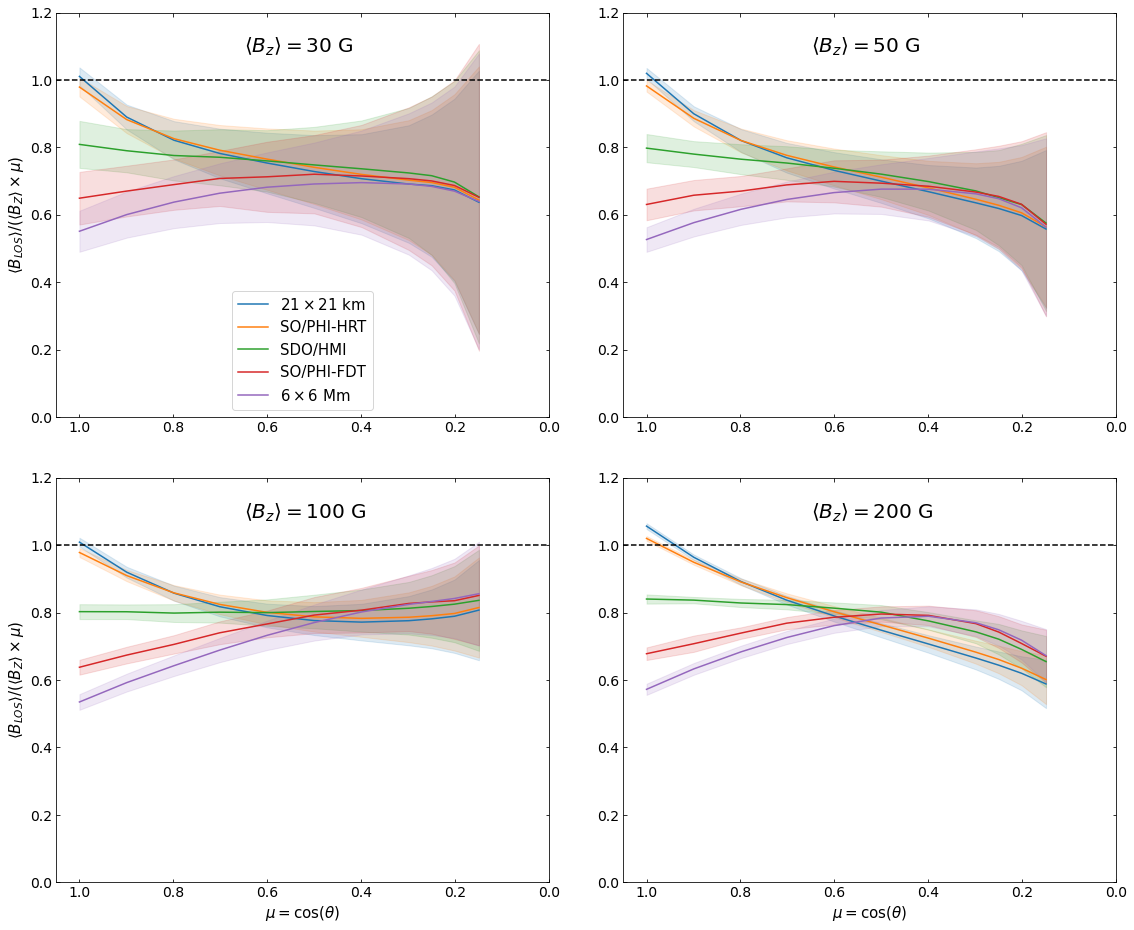

In [60]:
%matplotlib inline
#MDI

fig = plt.figure(figsize = (19,16))
gs = fig.add_gridspec(2, 2, wspace=0.15, hspace=0.15, height_ratios = [1,1])

ax_30 = fig.add_subplot(gs[0, 0])
plot_blos_curves(ax_30, plot_MDI_MURaM_30, plot_MDI_fdt_30, plot_MDI_hrt_30, plot_MDI_hmi_30, plot_MDI_one_30, field_strength = '30', \
                 xlabel = None, ylabel = True, mu_lim=11, shaded_err = True, plt_legend=True, div_by_exp=True)
y = 0.9*ax_30.get_ylim()[1]
ax_30.tick_params(top=True, bottom=True, left=True, right=True, labeltop=False, labelbottom=True, direction="in")
ax_30.text(0.65,y,r"$\langle B_z \rangle = 30$ G", fontsize=20)

ax_50 = fig.add_subplot(gs[0, 1])
plot_blos_curves(ax_50, plot_MDI_MURaM_50, plot_MDI_fdt_50, plot_MDI_hrt_50, plot_MDI_hmi_50, plot_MDI_one_50, field_strength = '50', \
                 xlabel = None, ylabel = None, mu_lim=11, shaded_err = True, div_by_exp=True)
y = 0.9*ax_50.get_ylim()[1]
ax_50.tick_params(top=True, bottom=True, left=True, right=True, labeltop=False, labelbottom=True, direction="in")
ax_50.text(0.65,y,r"$\langle B_z \rangle = 50$ G", fontsize=20)

ax_100 = fig.add_subplot(gs[1, 0])
plot_blos_curves(ax_100, plot_MDI_MURaM_100, plot_MDI_fdt_100, plot_MDI_hrt_100, plot_MDI_hmi_100, plot_MDI_one_100, field_strength = '100', \
                 xlabel = True, ylabel = True, mu_lim=11, shaded_err = True, div_by_exp=True)
y = 0.9*ax_100.get_ylim()[1]
ax_100.tick_params(top=True, bottom=True, left=True, right=True, labeltop=False, labelbottom=True, direction="in")
ax_100.text(0.65,y,r"$\langle B_z \rangle = 100$ G", fontsize=20)

ax_200 = fig.add_subplot(gs[1, 1])
plot_blos_curves(ax_200, plot_MDI_MURaM_200, plot_MDI_fdt_200, plot_MDI_hrt_200, plot_MDI_hmi_200, plot_MDI_one_200, field_strength = '200', \
                 xlabel = True, ylabel = None, mu_lim=11, shaded_err = True, div_by_exp=True)
y = 0.9*ax_200.get_ylim()[1]
ax_200.tick_params(top=True, bottom=True, left=True, right=True, labeltop=False, labelbottom=True, direction="in")
ax_200.text(0.65,y,r"$\langle B_z \rangle = 200$ G", fontsize=20)

plt.tight_layout()
plt.savefig('./plots/mdi_blos_clv_frac_5250_ticks.png', dpi=300, bbox_inches='tight', transparent=False)
plt.show()

(5, 2, 13)
(5, 2, 13)
(5, 2, 13)
(5, 2, 13)
(5, 2, 13)
(5, 2, 13)
(5, 2, 13)
(5, 2, 13)


/home/sinjan/.conda/envs/dataproc/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


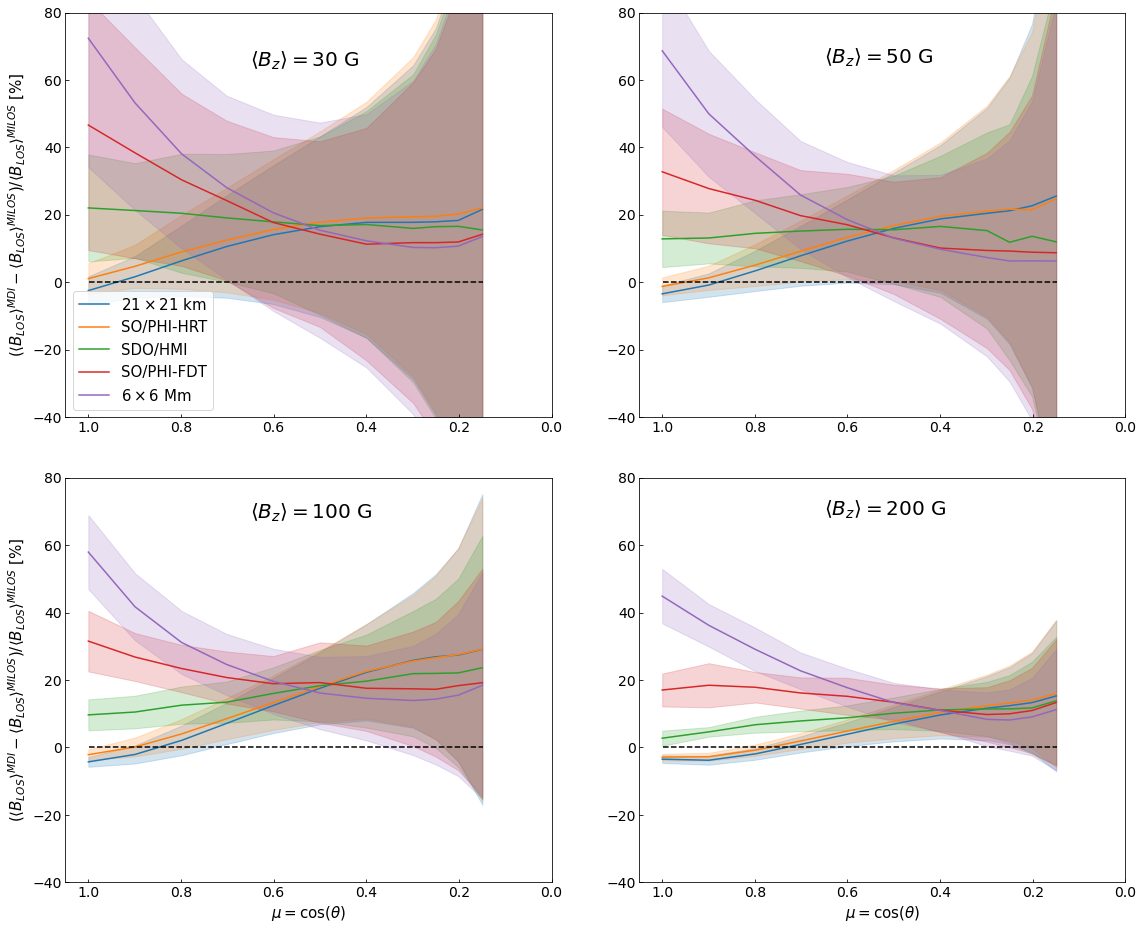

In [74]:
%matplotlib inline

fig = plt.figure(figsize = (19,16))
gs = fig.add_gridspec(2, 2, wspace=0.18, hspace=0.15, height_ratios = [1,1])

ax_30 = fig.add_subplot(gs[0, 0])
plot_blos_diff_curves(ax_30, [plot_MURaM_30, plot_fdt_30, plot_hrt_30, plot_hmi_30, plot_one_30], \
                      [plot_MDI_MURaM_30, plot_MDI_fdt_30, plot_MDI_hrt_30, plot_MDI_hmi_30, plot_MDI_one_30], \
                      field_strength = '30', xlabel = None, \
                      ylabel = r"$(\langle B_{LOS}\rangle^{MDI}-\langle B_{LOS}\rangle^{MILOS})/\langle B_{LOS}\rangle^{MILOS}$ [%]", \
                      errorbar=False, percent=True, lloc = "lower left", plt_legend=True)
plt.ylim(-40,80)
ax_30.axhline(y=0,xmin=0.05,xmax=0.86,color='black',linestyle='--')
y = 0.8*ax_30.get_ylim()[1]
ax_30.text(0.65,y,r"$\langle B_z \rangle = 30$ G", fontsize=20)

ax_50 = fig.add_subplot(gs[0, 1])
plot_blos_diff_curves(ax_50, [plot_MURaM_50, plot_fdt_50, plot_hrt_50, plot_hmi_50, plot_one_50], \
                      [plot_MDI_MURaM_50, plot_MDI_fdt_50, plot_MDI_hrt_50, plot_MDI_hmi_50, plot_MDI_one_50], \
                      field_strength = '50', xlabel = None, ylabel = None, errorbar=False, percent=True, lloc = "upper center")
plt.ylim(-40,80)
ax_50.axhline(y=0,xmin=0.05,xmax=0.86,color='black',linestyle='--')
y = 0.81*ax_50.get_ylim()[1]
ax_50.text(0.65,y,r"$\langle B_z \rangle = 50$ G", fontsize=20)

ax_100 = fig.add_subplot(gs[1, 0])
plot_blos_diff_curves(ax_100, [plot_MURaM_100, plot_fdt_100, plot_hrt_100, plot_hmi_100, plot_one_100], \
                      [plot_MDI_MURaM_100, plot_MDI_fdt_100, plot_MDI_hrt_100, plot_MDI_hmi_100, plot_MDI_one_100], \
                      field_strength = '100', xlabel = True, \
                      ylabel = r"$(\langle B_{LOS}\rangle^{MDI}-\langle B_{LOS}\rangle^{MILOS})/\langle B_{LOS}\rangle^{MILOS}$ [%]", \
                      errorbar=False, percent=True, lloc = "upper center")
plt.ylim(-40,80)
y = 0.85*ax_100.get_ylim()[1]
ax_100.axhline(y=0,xmin=0.05,xmax=0.86,color='black',linestyle='--')
ax_100.text(0.65,y,r"$\langle B_z \rangle = 100$ G", fontsize=20)

ax_200 = fig.add_subplot(gs[1, 1])
plot_blos_diff_curves(ax_200, [plot_MURaM_200, plot_fdt_200, plot_hrt_200, plot_hmi_200, plot_one_200], \
                      [plot_MDI_MURaM_200, plot_MDI_fdt_200, plot_MDI_hrt_200, plot_MDI_hmi_200, plot_MDI_one_200], \
                      field_strength = '200', xlabel = True, ylabel = None, errorbar=False, percent=True, lloc = "upper center")
plt.ylim(-40,80)
y = 0.86*ax_200.get_ylim()[1]
ax_200.axhline(y=0,xmin=0.05,xmax=0.86,color='black',linestyle='--')
ax_200.text(0.65,y,r"$\langle B_z \rangle = 200$ G", fontsize=20)

plt.tight_layout()
plt.savefig('./plots/milos_mdi_diff_fixed_lims_5250.png', dpi=300, bbox_inches='tight', transparent=False)
plt.show()

# 5250 COG

In [61]:
#load one pixel results
with open(r"./blos_pickles/cog_200_5250_onepix_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_one_200 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cog_120_5250_onepix_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_one_120 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cog_100_5250_onepix_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_one_100 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cog_50_5250_onepix_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_one_50 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cog_30_5250_onepix_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_one_30 = cPickle.load(output_file)

In [62]:
plot_COG_one_200,plot_COG_one_120,plot_COG_one_100,plot_COG_one_50,plot_COG_one_30 = get_corr_avg_std_of_pos_neg(res_one_200,res_one_120,res_one_100,res_one_50,res_one_30,std_err = False)

In [63]:
#load hmi results
with open(r"./blos_pickles/cog_200_5250_HMI_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_hmi_200 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cog_120_5250_HMI_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_hmi_120 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cog_100_5250_HMI_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_hmi_100 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cog_50_5250_HMI_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_hmi_50 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cog_30_5250_HMI_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_hmi_30 = cPickle.load(output_file)
    
#res_hmi_200a,res_hmi_120a,res_hmi_100a,res_hmi_50a,res_hmi_30a = avg_pos_neg(res_hmi_200,res_hmi_120,res_hmi_100,res_hmi_50,res_hmi_30)

In [64]:
plot_COG_hmi_200,plot_COG_hmi_120,plot_COG_hmi_100,plot_COG_hmi_50,plot_COG_hmi_30 = get_corr_avg_std_of_pos_neg(res_hmi_200,res_hmi_120,res_hmi_100,res_hmi_50,res_hmi_30,std_err = False)

In [65]:
#load fdt results
with open(r"./blos_pickles/cog_200_5250_FDT_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_fdt_200 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cog_120_5250_FDT_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_fdt_120 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cog_100_5250_FDT_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_fdt_100 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cog_50_5250_FDT_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_fdt_50 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cog_30_5250_FDT_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_fdt_30 = cPickle.load(output_file)
    
#res_fdt_200a,res_fdt_120a,res_fdt_100a,res_fdt_50a,res_fdt_30a = avg_pos_neg(res_fdt_200,res_fdt_120,res_fdt_100,res_fdt_50,res_fdt_30)

In [66]:
plot_COG_fdt_200,plot_COG_fdt_120,plot_COG_fdt_100,plot_COG_fdt_50,plot_COG_fdt_30 = get_corr_avg_std_of_pos_neg(res_fdt_200,res_fdt_120,res_fdt_100,res_fdt_50,res_fdt_30,std_err = False)

In [67]:
#load hrt results
with open(r"./blos_pickles/cog_200_5250_HRT_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_hrt_200 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cog_120_5250_HRT_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_hrt_120 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cog_100_5250_HRT_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_hrt_100 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cog_50_5250_HRT_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_hrt_50 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cog_30_5250_HRT_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_hrt_30 = cPickle.load(output_file)
    
#res_hrt_200a,res_hrt_120a,res_hrt_100a,res_hrt_50a,res_hrt_30a = avg_pos_neg(res_hrt_200,res_hrt_120,res_hrt_100,res_hrt_50,res_hrt_30)

In [68]:
plot_COG_hrt_200,plot_COG_hrt_120,plot_COG_hrt_100,plot_COG_hrt_50,plot_COG_hrt_30 = get_corr_avg_std_of_pos_neg(res_hrt_200,res_hrt_120,res_hrt_100,res_hrt_50,res_hrt_30,std_err = False)

In [69]:
#load MURaM results
with open(r"./blos_pickles/cog_200_5250_MURaM_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_MURaM_200 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cog_120_5250_MURaM_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_MURaM_120 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cog_100_5250_MURaM_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_MURaM_100 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cog_50_5250_MURaM_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_MURaM_50 = cPickle.load(output_file)
    
with open(r"./blos_pickles/cog_30_5250_MURaM_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_MURaM_30 = cPickle.load(output_file)

In [70]:
plot_COG_MURaM_200,plot_COG_MURaM_120,plot_COG_MURaM_100,plot_COG_MURaM_50,plot_COG_MURaM_30 = get_corr_avg_std_of_pos_neg(res_MURaM_200,res_MURaM_120,res_MURaM_100,res_MURaM_50,res_MURaM_30,std_err = False)

/home/sinjan/.conda/envs/dataproc/lib/python3.7/site-packages/ipykernel_launcher.py:33: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


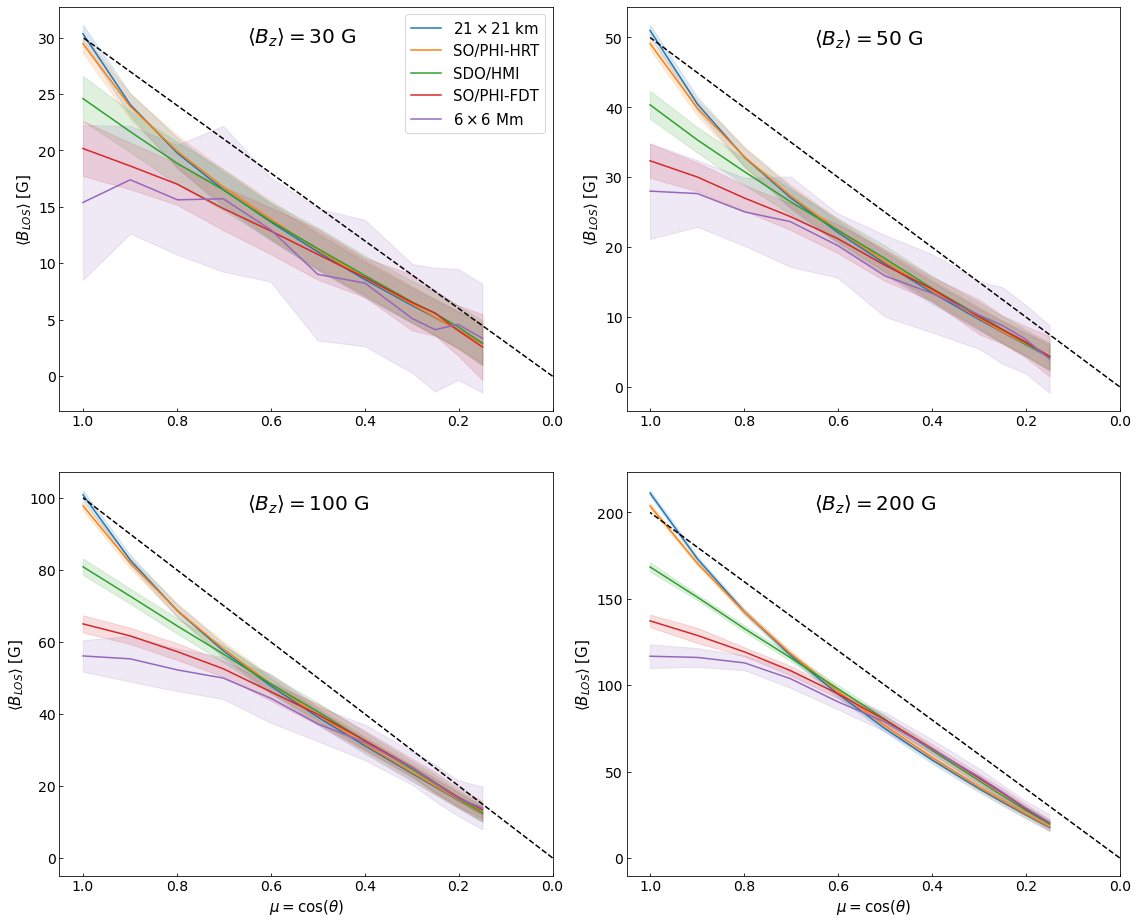

In [61]:
%matplotlib inline
#COG

fig = plt.figure(figsize = (19,16))
gs = fig.add_gridspec(2, 2, wspace=0.15, hspace=0.15, height_ratios = [1,1])

ax_30 = fig.add_subplot(gs[0, 0])
plot_blos_curves(ax_30, plot_COG_MURaM_30, plot_COG_fdt_30, plot_COG_hrt_30, plot_COG_hmi_30, plot_COG_one_30, \
                 field_strength = '30', xlabel = None, ylabel = True, mu_lim=11, shaded_err = True, plt_legend=True)
y = 0.9*ax_30.get_ylim()[1]
ax_30.text(0.65,y,r"$\langle B_z \rangle = 30$ G", fontsize=20)

ax_50 = fig.add_subplot(gs[0, 1])
plot_blos_curves(ax_50, plot_COG_MURaM_50, plot_COG_fdt_50, plot_COG_hrt_50, plot_COG_hmi_50, plot_COG_one_50, field_strength = '50', xlabel = None, ylabel = True, mu_lim=11, shaded_err = True)
y = 0.9*ax_50.get_ylim()[1]
ax_50.text(0.65,y,r"$\langle B_z \rangle = 50$ G", fontsize=20)

ax_100 = fig.add_subplot(gs[1, 0])
plot_blos_curves(ax_100, plot_COG_MURaM_100, plot_COG_fdt_100, plot_COG_hrt_100, plot_COG_hmi_100, plot_COG_one_100, field_strength = '100', xlabel = True, ylabel = True, mu_lim=11, shaded_err = True)
y = 0.9*ax_100.get_ylim()[1]
ax_100.text(0.65,y,r"$\langle B_z \rangle = 100$ G", fontsize=20)

# ax_120 = fig.add_subplot(gs[1, 1])
# plot_blos_curves(ax_120, plot_COG_MURaM_120, plot_COG_fdt_120, plot_COG_hrt_120, plot_COG_hmi_120, plot_COG_one_120, field_strength = '120', xlabel = True, ylabel = True)
# y = 0.9*ax_120.get_ylim()[1]
# ax_120.text(0.65,y,r"$\langle B_z \rangle = 120$ G", fontsize=20)

ax_200 = fig.add_subplot(gs[1, 1])
plot_blos_curves(ax_200, plot_COG_MURaM_200, plot_COG_fdt_200, plot_COG_hrt_200, plot_COG_hmi_200, plot_COG_one_200, field_strength = '200', xlabel = True, ylabel = True, mu_lim=11, shaded_err = True)
y = 0.9*ax_200.get_ylim()[1]
ax_200.text(0.65,y,r"$\langle B_z \rangle = 200$ G", fontsize=20)

plt.tight_layout()
plt.show()

(5, 2, 13)
(5, 2, 13)
(5, 2, 13)
(5, 2, 13)
(5, 2, 13)
(5, 2, 13)
(5, 2, 13)
(5, 2, 13)


/home/sinjan/.conda/envs/dataproc/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


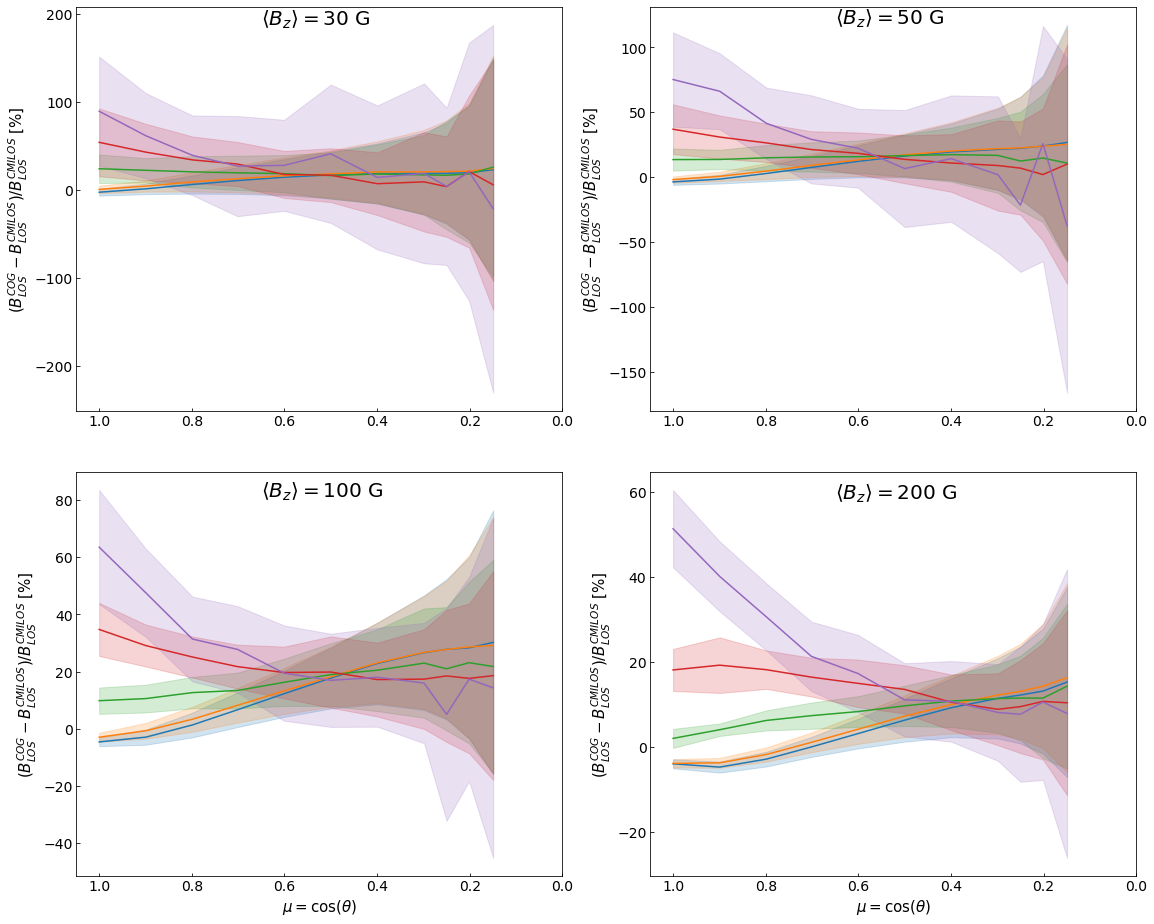

In [72]:
%matplotlib inline

fig = plt.figure(figsize = (19,16))
gs = fig.add_gridspec(2, 2, wspace=0.18, hspace=0.15, height_ratios = [1,1])

ax_30 = fig.add_subplot(gs[0, 0])
plot_blos_diff_curves(ax_30, [plot_MURaM_30, plot_fdt_30, plot_hrt_30, plot_hmi_30, plot_one_30], [plot_COG_MURaM_30, plot_COG_fdt_30, plot_COG_hrt_30, plot_COG_hmi_30, plot_COG_one_30], field_strength = '30', xlabel = None, ylabel = r"$(B_{LOS}^{COG}-B_{LOS}^{CMILOS})/B_{LOS}^{CMILOS}$ [%]", errorbar=False, percent=True)
y = 0.9*ax_30.get_ylim()[1]
ax_30.text(0.65,y,r"$\langle B_z \rangle = 30$ G", fontsize=20)

ax_50 = fig.add_subplot(gs[0, 1])
plot_blos_diff_curves(ax_50, [plot_MURaM_50, plot_fdt_50, plot_hrt_50, plot_hmi_50, plot_one_50], [plot_COG_MURaM_50, plot_COG_fdt_50, plot_COG_hrt_50, plot_COG_hmi_50, plot_COG_one_50], field_strength = '50', xlabel = None, ylabel = r"$(B_{LOS}^{COG}-B_{LOS}^{CMILOS})/B_{LOS}^{CMILOS}$ [%]", errorbar=False, percent=True)
y = 0.9*ax_50.get_ylim()[1]
ax_50.text(0.65,y,r"$\langle B_z \rangle = 50$ G", fontsize=20)

ax_100 = fig.add_subplot(gs[1, 0])
plot_blos_diff_curves(ax_100, [plot_MURaM_100, plot_fdt_100, plot_hrt_100, plot_hmi_100, plot_one_100], [plot_COG_MURaM_100, plot_COG_fdt_100, plot_COG_hrt_100, plot_COG_hmi_100, plot_COG_one_100], field_strength = '100', xlabel = True, ylabel = r"$(B_{LOS}^{COG}-B_{LOS}^{CMILOS})/B_{LOS}^{CMILOS}$ [%]", errorbar=False, percent=True)
y = 0.9*ax_100.get_ylim()[1]
ax_100.text(0.65,y,r"$\langle B_z \rangle = 100$ G", fontsize=20)

ax_200 = fig.add_subplot(gs[1, 1])
plot_blos_diff_curves(ax_200, [plot_MURaM_200, plot_fdt_200, plot_hrt_200, plot_hmi_200, plot_one_200], [plot_COG_MURaM_200, plot_COG_fdt_200, plot_COG_hrt_200, plot_COG_hmi_200, plot_COG_one_200], field_strength = '200', xlabel = True, ylabel = r"$(B_{LOS}^{COG}-B_{LOS}^{CMILOS})/B_{LOS}^{CMILOS}$ [%]", errorbar=False, percent=True)
y = 0.9*ax_200.get_ylim()[1]
ax_200.text(0.65,y,r"$\langle B_z \rangle = 200$ G", fontsize=20)

plt.tight_layout()
plt.show()

/home/sinjan/.conda/envs/dataproc/lib/python3.7/site-packages/ipykernel_launcher.py:40: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


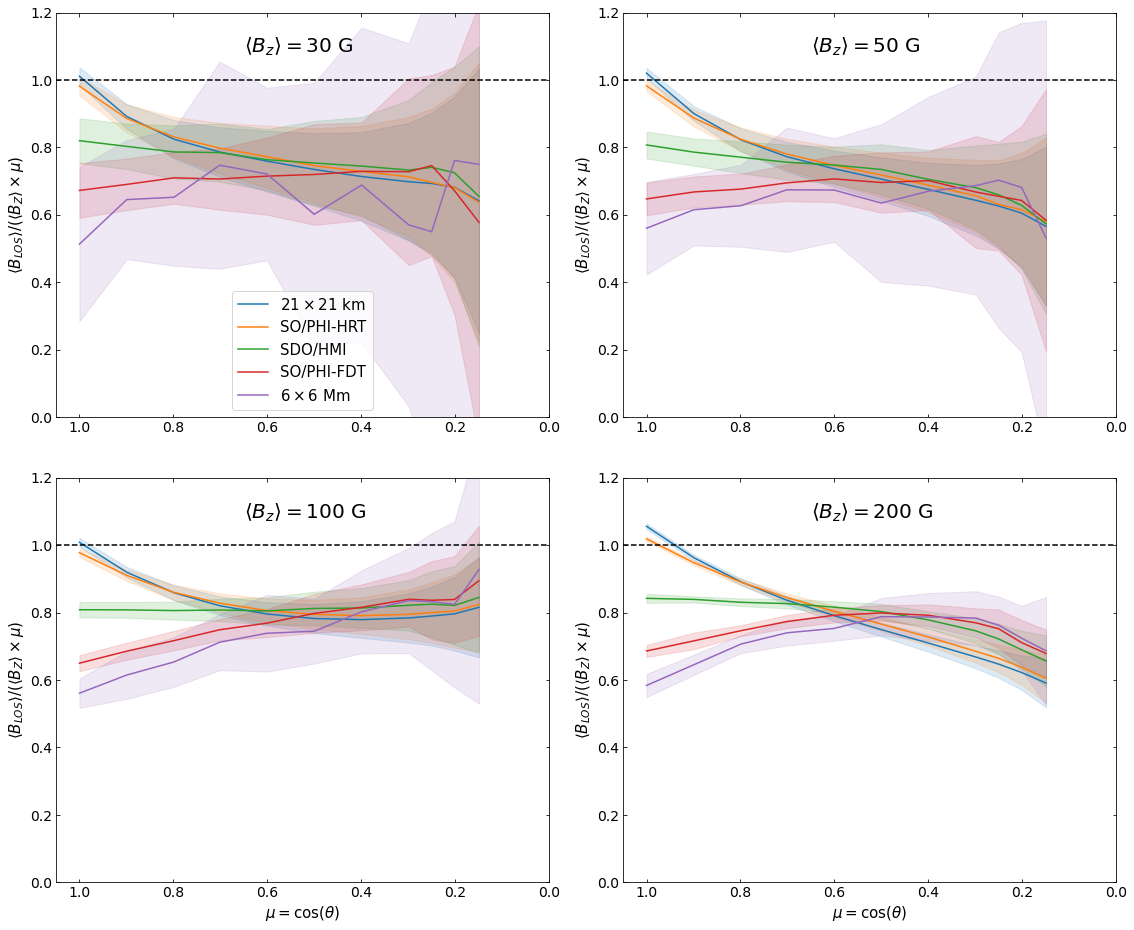

In [72]:
%matplotlib inline
#COG

fig = plt.figure(figsize = (19,16))
gs = fig.add_gridspec(2, 2, wspace=0.15, hspace=0.15, height_ratios = [1,1])

ax_30 = fig.add_subplot(gs[0, 0])
plot_blos_curves(ax_30, plot_COG_MURaM_30, plot_COG_fdt_30, plot_COG_hrt_30, plot_COG_hmi_30, plot_COG_one_30, \
                 field_strength = '30', xlabel = None, ylabel = True, mu_lim=11, shaded_err = True, plt_legend=True, div_by_exp=True)
y = 0.9*ax_30.get_ylim()[1]
ax_30.tick_params(top=True, bottom=True, left=True, right=True, labeltop=False, labelbottom=True, direction="in")
ax_30.text(0.65,y,r"$\langle B_z \rangle = 30$ G", fontsize=20)

ax_50 = fig.add_subplot(gs[0, 1])
plot_blos_curves(ax_50, plot_COG_MURaM_50, plot_COG_fdt_50, plot_COG_hrt_50, plot_COG_hmi_50, plot_COG_one_50, \
                 field_strength = '50', xlabel = None, ylabel = True, mu_lim=11, shaded_err = True, div_by_exp=True)
y = 0.9*ax_50.get_ylim()[1]
ax_50.tick_params(top=True, bottom=True, left=True, right=True, labeltop=False, labelbottom=True, direction="in")
ax_50.text(0.65,y,r"$\langle B_z \rangle = 50$ G", fontsize=20)

ax_100 = fig.add_subplot(gs[1, 0])
plot_blos_curves(ax_100, plot_COG_MURaM_100, plot_COG_fdt_100, plot_COG_hrt_100, plot_COG_hmi_100, plot_COG_one_100, \
                 field_strength = '100', xlabel = True, ylabel = True, mu_lim=11, shaded_err = True, div_by_exp=True)
y = 0.9*ax_100.get_ylim()[1]
ax_100.tick_params(top=True, bottom=True, left=True, right=True, labeltop=False, labelbottom=True, direction="in")
ax_100.text(0.65,y,r"$\langle B_z \rangle = 100$ G", fontsize=20)

# ax_120 = fig.add_subplot(gs[1, 1])
# plot_blos_curves(ax_120, plot_COG_MURaM_120, plot_COG_fdt_120, plot_COG_hrt_120, plot_COG_hmi_120, plot_COG_one_120, field_strength = '120', xlabel = True, ylabel = True)
# y = 0.9*ax_120.get_ylim()[1]
# ax_120.text(0.65,y,r"$\langle B_z \rangle = 120$ G", fontsize=20)

ax_200 = fig.add_subplot(gs[1, 1])
plot_blos_curves(ax_200, plot_COG_MURaM_200, plot_COG_fdt_200, plot_COG_hrt_200, plot_COG_hmi_200, plot_COG_one_200, \
                 field_strength = '200', xlabel = True, ylabel = True, mu_lim=11, shaded_err = True, div_by_exp=True)
y = 0.9*ax_200.get_ylim()[1]
ax_200.tick_params(top=True, bottom=True, left=True, right=True, labeltop=False, labelbottom=True, direction="in")
ax_200.text(0.65,y,r"$\langle B_z \rangle = 200$ G", fontsize=20)

plt.tight_layout()
plt.savefig('./plots/cog_clv_blos_frac_5250_ticks.png', dpi=300, bbox_inches='tight', transparent=False)
plt.show()

(5, 2, 13)
(5, 2, 13)
(5, 2, 13)
(5, 2, 13)
(5, 2, 13)
(5, 2, 13)
(5, 2, 13)
(5, 2, 13)


/home/sinjan/.conda/envs/dataproc/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


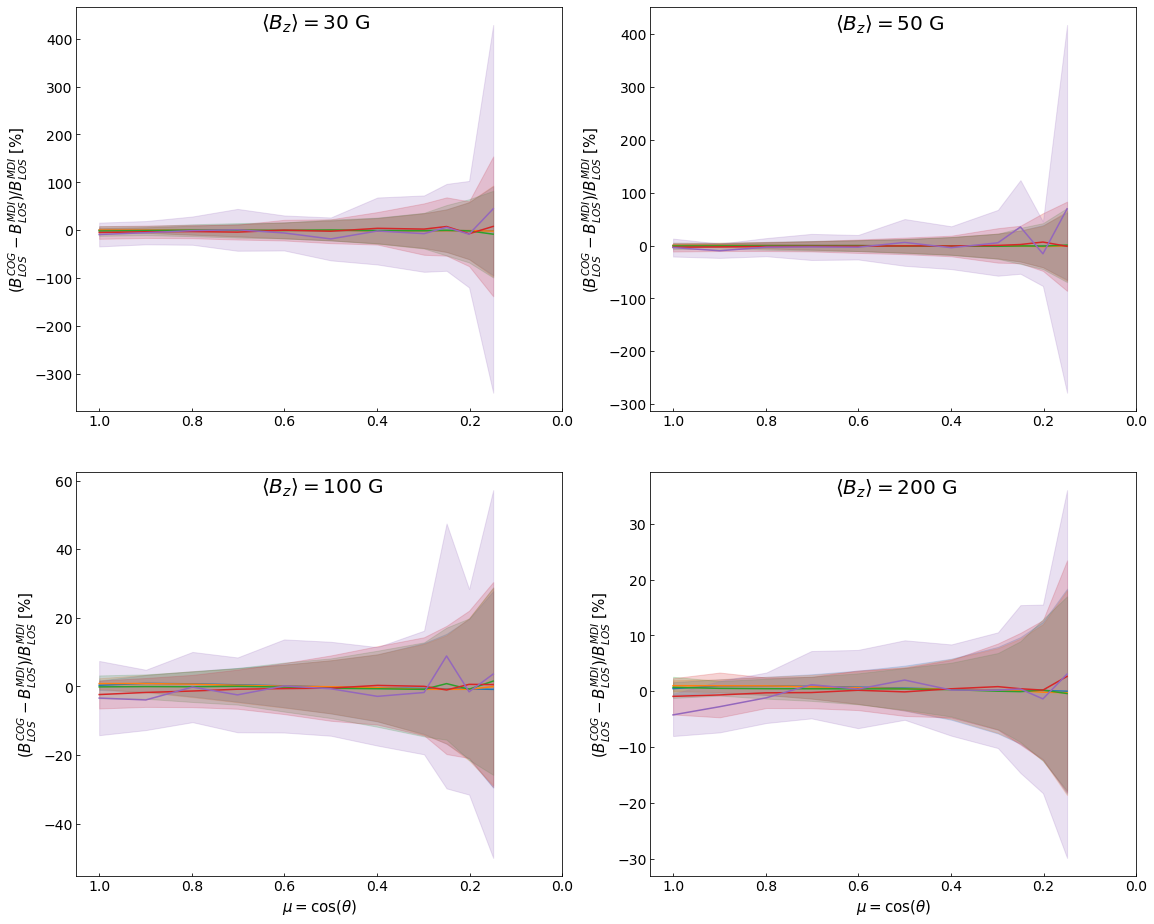

In [73]:
%matplotlib inline

fig = plt.figure(figsize = (19,16))
gs = fig.add_gridspec(2, 2, wspace=0.18, hspace=0.15, height_ratios = [1,1])

ax_30 = fig.add_subplot(gs[0, 0])
plot_blos_diff_curves(ax_30, [plot_COG_MURaM_30, plot_COG_fdt_30, plot_COG_hrt_30, plot_COG_hmi_30, plot_COG_one_30], [plot_MDI_MURaM_30, plot_MDI_fdt_30, plot_MDI_hrt_30, plot_MDI_hmi_30, plot_MDI_one_30], field_strength = '30', xlabel = None, ylabel = r"$(B_{LOS}^{COG}-B_{LOS}^{MDI})/B_{LOS}^{MDI}$ [%]", errorbar=False, percent=True)
y = 0.9*ax_30.get_ylim()[1]
ax_30.text(0.65,y,r"$\langle B_z \rangle = 30$ G", fontsize=20)

ax_50 = fig.add_subplot(gs[0, 1])
plot_blos_diff_curves(ax_50, [plot_COG_MURaM_50, plot_COG_fdt_50, plot_COG_hrt_50, plot_COG_hmi_50, plot_COG_one_50], [plot_MDI_MURaM_50, plot_MDI_fdt_50, plot_MDI_hrt_50, plot_MDI_hmi_50, plot_MDI_one_50], field_strength = '50', xlabel = None, ylabel = r"$(B_{LOS}^{COG}-B_{LOS}^{MDI})/B_{LOS}^{MDI}$ [%]", errorbar=False, percent=True)
y = 0.9*ax_50.get_ylim()[1]
ax_50.text(0.65,y,r"$\langle B_z \rangle = 50$ G", fontsize=20)

ax_100 = fig.add_subplot(gs[1, 0])
plot_blos_diff_curves(ax_100, [plot_COG_MURaM_100, plot_COG_fdt_100, plot_COG_hrt_100, plot_COG_hmi_100, plot_COG_one_100], [plot_MDI_MURaM_100, plot_MDI_fdt_100, plot_MDI_hrt_100, plot_MDI_hmi_100, plot_MDI_one_100], field_strength = '100', xlabel = True, ylabel = r"$(B_{LOS}^{COG}-B_{LOS}^{MDI})/B_{LOS}^{MDI}$ [%]", errorbar=False, percent=True)
y = 0.9*ax_100.get_ylim()[1]
ax_100.text(0.65,y,r"$\langle B_z \rangle = 100$ G", fontsize=20)

ax_200 = fig.add_subplot(gs[1, 1])
plot_blos_diff_curves(ax_200, [plot_COG_MURaM_200, plot_COG_fdt_200, plot_COG_hrt_200, plot_COG_hmi_200, plot_COG_one_200], [plot_MDI_MURaM_200, plot_MDI_fdt_200, plot_MDI_hrt_200, plot_MDI_hmi_200, plot_MDI_one_200], field_strength = '200', xlabel = True, ylabel = r"$(B_{LOS}^{COG}-B_{LOS}^{MDI})/B_{LOS}^{MDI}$ [%]", errorbar=False, percent=True)
y = 0.9*ax_200.get_ylim()[1]
ax_200.text(0.65,y,r"$\langle B_z \rangle = 200$ G", fontsize=20)

plt.tight_layout()
plt.show()

# 6173 WFA

In [73]:
#load one pixel results
with open(r"./blos_pickles/wfa_200_6173_onepix_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_one_200 = cPickle.load(output_file)
    
with open(r"./blos_pickles/wfa_120_6173_onepix_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_one_120 = cPickle.load(output_file)
    
with open(r"./blos_pickles/wfa_100_6173_onepix_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_one_100 = cPickle.load(output_file)
    
with open(r"./blos_pickles/wfa_50_6173_onepix_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_one_50 = cPickle.load(output_file)
    
with open(r"./blos_pickles/wfa_30_6173_onepix_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_one_30 = cPickle.load(output_file)

In [74]:
plot_WFA_one_200,plot_WFA_one_120,plot_WFA_one_100,plot_WFA_one_50,plot_WFA_one_30 = get_corr_avg_std_of_pos_neg(res_one_200,res_one_120,res_one_100,res_one_50,res_one_30,std_err = False)

In [75]:
#load hmi results
with open(r"./blos_pickles/wfa_200_6173_HMI_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_hmi_200 = cPickle.load(output_file)
    
with open(r"./blos_pickles/wfa_120_6173_HMI_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_hmi_120 = cPickle.load(output_file)
    
with open(r"./blos_pickles/wfa_100_6173_HMI_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_hmi_100 = cPickle.load(output_file)
    
with open(r"./blos_pickles/wfa_50_6173_HMI_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_hmi_50 = cPickle.load(output_file)
    
with open(r"./blos_pickles/wfa_30_6173_HMI_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_hmi_30 = cPickle.load(output_file)
    
#res_hmi_200a,res_hmi_120a,res_hmi_100a,res_hmi_50a,res_hmi_30a = avg_pos_neg(res_hmi_200,res_hmi_120,res_hmi_100,res_hmi_50,res_hmi_30)

In [76]:
plot_WFA_hmi_200,plot_WFA_hmi_120,plot_WFA_hmi_100,plot_WFA_hmi_50,plot_WFA_hmi_30 = get_corr_avg_std_of_pos_neg(res_hmi_200,res_hmi_120,res_hmi_100,res_hmi_50,res_hmi_30,std_err = False)

In [77]:
#load fdt results
with open(r"./blos_pickles/wfa_200_6173_FDT_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_fdt_200 = cPickle.load(output_file)
    
with open(r"./blos_pickles/wfa_120_6173_FDT_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_fdt_120 = cPickle.load(output_file)
    
with open(r"./blos_pickles/wfa_100_6173_FDT_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_fdt_100 = cPickle.load(output_file)
    
with open(r"./blos_pickles/wfa_50_6173_FDT_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_fdt_50 = cPickle.load(output_file)
    
with open(r"./blos_pickles/wfa_30_6173_FDT_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_fdt_30 = cPickle.load(output_file)
    
#res_fdt_200a,res_fdt_120a,res_fdt_100a,res_fdt_50a,res_fdt_30a = avg_pos_neg(res_fdt_200,res_fdt_120,res_fdt_100,res_fdt_50,res_fdt_30)

In [78]:
plot_WFA_fdt_200,plot_WFA_fdt_120,plot_WFA_fdt_100,plot_WFA_fdt_50,plot_WFA_fdt_30 = get_corr_avg_std_of_pos_neg(res_fdt_200,res_fdt_120,res_fdt_100,res_fdt_50,res_fdt_30,std_err = False)

In [79]:
#load hrt results
with open(r"./blos_pickles/wfa_200_6173_HRT_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_hrt_200 = cPickle.load(output_file)
    
with open(r"./blos_pickles/wfa_120_6173_HRT_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_hrt_120 = cPickle.load(output_file)
    
with open(r"./blos_pickles/wfa_100_6173_HRT_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_hrt_100 = cPickle.load(output_file)
    
with open(r"./blos_pickles/wfa_50_6173_HRT_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_hrt_50 = cPickle.load(output_file)
    
with open(r"./blos_pickles/wfa_30_6173_HRT_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_hrt_30 = cPickle.load(output_file)
    
#res_hrt_200a,res_hrt_120a,res_hrt_100a,res_hrt_50a,res_hrt_30a = avg_pos_neg(res_hrt_200,res_hrt_120,res_hrt_100,res_hrt_50,res_hrt_30)

In [80]:
plot_WFA_hrt_200,plot_WFA_hrt_120,plot_WFA_hrt_100,plot_WFA_hrt_50,plot_WFA_hrt_30 = get_corr_avg_std_of_pos_neg(res_hrt_200,res_hrt_120,res_hrt_100,res_hrt_50,res_hrt_30,std_err = False)

In [81]:
#load MURaM results
with open(r"./blos_pickles/wfa_200_6173_MURaM_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_MURaM_200 = cPickle.load(output_file)
    
with open(r"./blos_pickles/wfa_120_6173_MURaM_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_MURaM_120 = cPickle.load(output_file)
    
with open(r"./blos_pickles/wfa_100_6173_MURaM_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_MURaM_100 = cPickle.load(output_file)
    
with open(r"./blos_pickles/wfa_50_6173_MURaM_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_MURaM_50 = cPickle.load(output_file)
    
with open(r"./blos_pickles/wfa_30_6173_MURaM_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_MURaM_30 = cPickle.load(output_file)

In [82]:
plot_WFA_MURaM_200,plot_WFA_MURaM_120,plot_WFA_MURaM_100,plot_WFA_MURaM_50,plot_WFA_MURaM_30 = get_corr_avg_std_of_pos_neg(res_MURaM_200,res_MURaM_120,res_MURaM_100,res_MURaM_50,res_MURaM_30,std_err = False)

/home/sinjan/.conda/envs/dataproc/lib/python3.7/site-packages/ipykernel_launcher.py:33: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


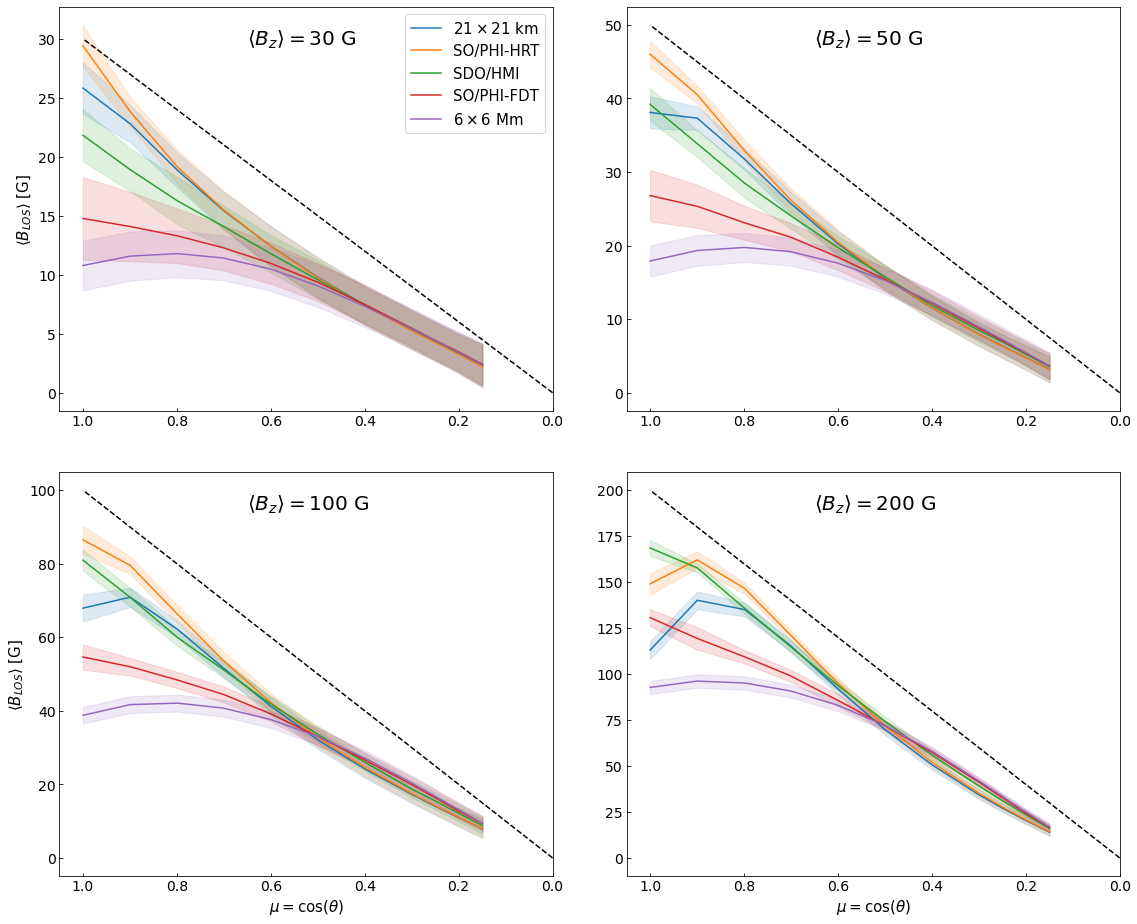

In [84]:
%matplotlib inline
#WFA

fig = plt.figure(figsize = (19,16))
gs = fig.add_gridspec(2, 2, wspace=0.15, hspace=0.15, height_ratios = [1,1])

ax_30 = fig.add_subplot(gs[0, 0])
plot_blos_curves(ax_30, plot_WFA_MURaM_30, plot_WFA_fdt_30, plot_WFA_hrt_30, plot_WFA_hmi_30, plot_WFA_one_30,\
                 field_strength = '30', xlabel = None, ylabel = True, mu_lim=11, shaded_err = True, plt_legend=True)
y = 0.9*ax_30.get_ylim()[1]
ax_30.text(0.65,y,r"$\langle B_z \rangle = 30$ G", fontsize=20)

ax_50 = fig.add_subplot(gs[0, 1])
plot_blos_curves(ax_50, plot_WFA_MURaM_50, plot_WFA_fdt_50, plot_WFA_hrt_50, plot_WFA_hmi_50, plot_WFA_one_50, field_strength = '50', xlabel = None, ylabel = None, mu_lim=11, shaded_err = True)
y = 0.9*ax_50.get_ylim()[1]
ax_50.text(0.65,y,r"$\langle B_z \rangle = 50$ G", fontsize=20)

ax_100 = fig.add_subplot(gs[1, 0])
plot_blos_curves(ax_100, plot_WFA_MURaM_100, plot_WFA_fdt_100, plot_WFA_hrt_100, plot_WFA_hmi_100, plot_WFA_one_100, field_strength = '100', xlabel = True, ylabel = True, mu_lim=11, shaded_err = True)
y = 0.9*ax_100.get_ylim()[1]
ax_100.text(0.65,y,r"$\langle B_z \rangle = 100$ G", fontsize=20)

# ax_120 = fig.add_subplot(gs[1, 1])
# plot_blos_curves(ax_120, plot_WFA_MURaM_120, plot_WFA_fdt_120, plot_WFA_hrt_120, plot_WFA_hmi_120, plot_WFA_one_120, field_strength = '120', xlabel = True, ylabel = True)
# y = 0.9*ax_120.get_ylim()[1]
# ax_120.text(0.65,y,r"$\langle B_z \rangle = 120$ G", fontsize=20)

ax_200 = fig.add_subplot(gs[1, 1])
plot_blos_curves(ax_200, plot_WFA_MURaM_200, plot_WFA_fdt_200, plot_WFA_hrt_200, plot_WFA_hmi_200, plot_WFA_one_200, field_strength = '200', xlabel = True, ylabel = None, mu_lim=11, shaded_err = True)
y = 0.9*ax_200.get_ylim()[1]
ax_200.text(0.65,y,r"$\langle B_z \rangle = 200$ G", fontsize=20)

plt.tight_layout()
plt.show()

(5, 2, 13)
(5, 2, 13)
(5, 2, 13)
(5, 2, 13)
(5, 2, 13)
(5, 2, 13)
(5, 2, 13)
(5, 2, 13)


/home/sinjan/.conda/envs/dataproc/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


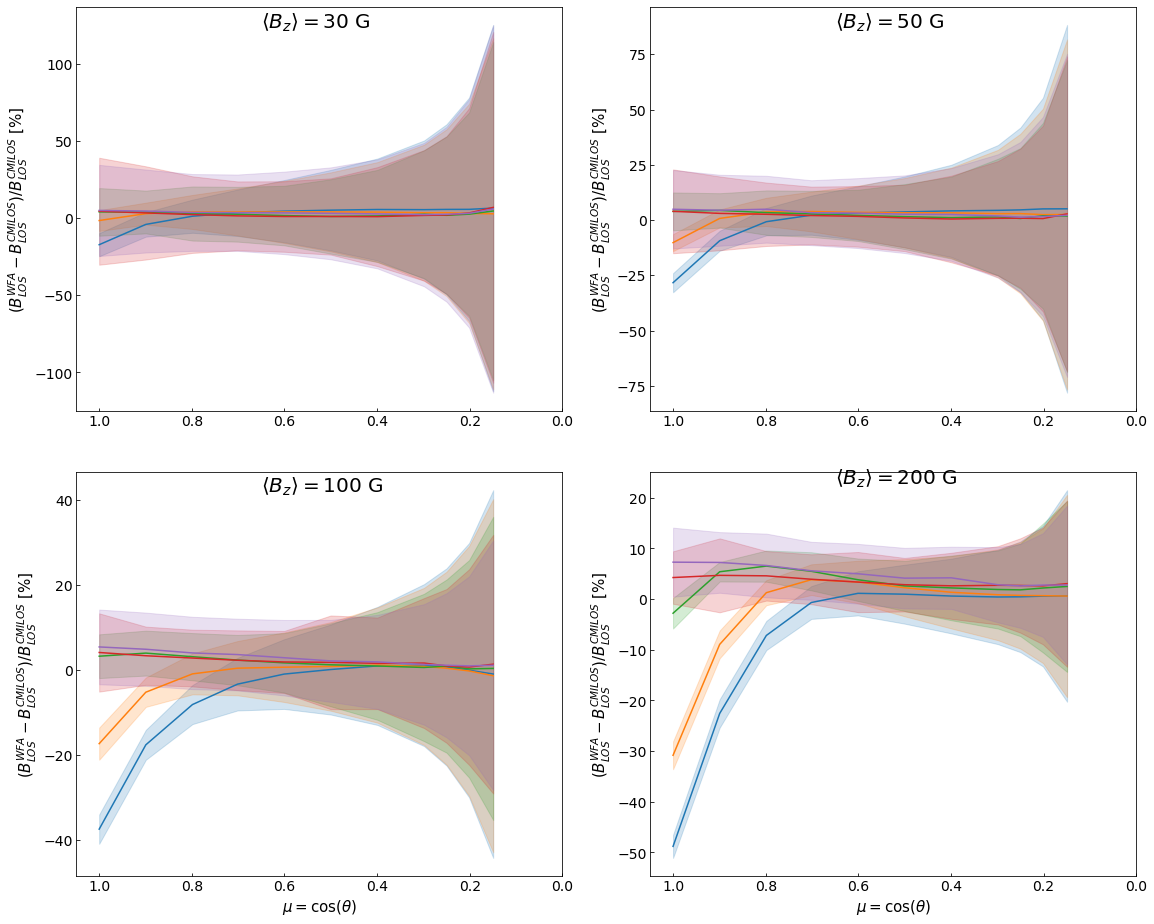

In [85]:
%matplotlib inline

fig = plt.figure(figsize = (19,16))
gs = fig.add_gridspec(2, 2, wspace=0.18, hspace=0.15, height_ratios = [1,1])

ax_30 = fig.add_subplot(gs[0, 0])
plot_blos_diff_curves(ax_30, [plot_MURaM_30, plot_fdt_30, plot_hrt_30, plot_hmi_30, plot_one_30], [plot_WFA_MURaM_30, plot_WFA_fdt_30, plot_WFA_hrt_30, plot_WFA_hmi_30, plot_WFA_one_30], field_strength = '30', xlabel = None, ylabel = r"$(B_{LOS}^{WFA}-B_{LOS}^{CMILOS})/B_{LOS}^{CMILOS}$ [%]", errorbar=False, percent=True)
y = 0.9*ax_30.get_ylim()[1]
ax_30.text(0.65,y,r"$\langle B_z \rangle = 30$ G", fontsize=20)

ax_50 = fig.add_subplot(gs[0, 1])
plot_blos_diff_curves(ax_50, [plot_MURaM_50, plot_fdt_50, plot_hrt_50, plot_hmi_50, plot_one_50], [plot_WFA_MURaM_50, plot_WFA_fdt_50, plot_WFA_hrt_50, plot_WFA_hmi_50, plot_WFA_one_50], field_strength = '50', xlabel = None, ylabel = r"$(B_{LOS}^{WFA}-B_{LOS}^{CMILOS})/B_{LOS}^{CMILOS}$ [%]", errorbar=False, percent=True)
y = 0.9*ax_50.get_ylim()[1]
ax_50.text(0.65,y,r"$\langle B_z \rangle = 50$ G", fontsize=20)

ax_100 = fig.add_subplot(gs[1, 0])
plot_blos_diff_curves(ax_100, [plot_MURaM_100, plot_fdt_100, plot_hrt_100, plot_hmi_100, plot_one_100], [plot_WFA_MURaM_100, plot_WFA_fdt_100, plot_WFA_hrt_100, plot_WFA_hmi_100, plot_WFA_one_100], field_strength = '100', xlabel = True, ylabel = r"$(B_{LOS}^{WFA}-B_{LOS}^{CMILOS})/B_{LOS}^{CMILOS}$ [%]", errorbar=False, percent=True)
y = 0.9*ax_100.get_ylim()[1]
ax_100.text(0.65,y,r"$\langle B_z \rangle = 100$ G", fontsize=20)

ax_200 = fig.add_subplot(gs[1, 1])
plot_blos_diff_curves(ax_200, [plot_MURaM_200, plot_fdt_200, plot_hrt_200, plot_hmi_200, plot_one_200], [plot_WFA_MURaM_200, plot_WFA_fdt_200, plot_WFA_hrt_200, plot_WFA_hmi_200, plot_WFA_one_200], field_strength = '200', xlabel = True, ylabel = r"$(B_{LOS}^{WFA}-B_{LOS}^{CMILOS})/B_{LOS}^{CMILOS}$ [%]", errorbar=False, percent=True)
y = 0.9*ax_200.get_ylim()[1]
ax_200.text(0.65,y,r"$\langle B_z \rangle = 200$ G", fontsize=20)

plt.tight_layout()
plt.show()

(5, 2, 13)
(5, 2, 13)
(5, 2, 13)
(5, 2, 13)
(5, 2, 13)
(5, 2, 13)
(5, 2, 13)
(5, 2, 13)


/home/sinjan/.conda/envs/dataproc/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


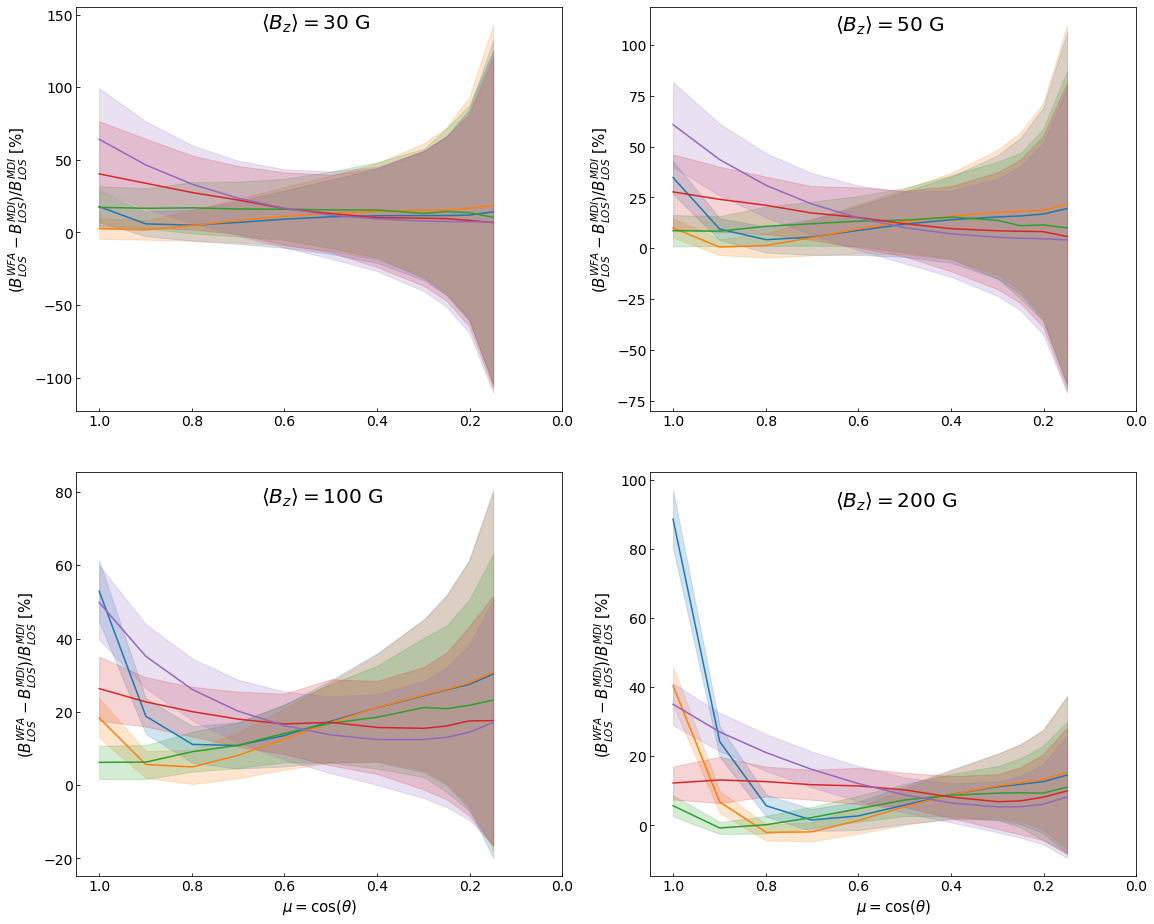

In [86]:
%matplotlib inline

fig = plt.figure(figsize = (19,16))
gs = fig.add_gridspec(2, 2, wspace=0.18, hspace=0.15, height_ratios = [1,1])

ax_30 = fig.add_subplot(gs[0, 0])
plot_blos_diff_curves(ax_30, [plot_WFA_MURaM_30, plot_WFA_fdt_30, plot_WFA_hrt_30, plot_WFA_hmi_30, plot_WFA_one_30], [plot_MDI_MURaM_30, plot_MDI_fdt_30, plot_MDI_hrt_30, plot_MDI_hmi_30, plot_MDI_one_30], field_strength = '30', xlabel = None, ylabel = r"$(B_{LOS}^{WFA}-B_{LOS}^{MDI})/B_{LOS}^{MDI}$ [%]", errorbar=False, percent=True)
y = 0.9*ax_30.get_ylim()[1]
ax_30.text(0.65,y,r"$\langle B_z \rangle = 30$ G", fontsize=20)

ax_50 = fig.add_subplot(gs[0, 1])
plot_blos_diff_curves(ax_50, [plot_WFA_MURaM_50, plot_WFA_fdt_50, plot_WFA_hrt_50, plot_WFA_hmi_50, plot_WFA_one_50], [plot_MDI_MURaM_50, plot_MDI_fdt_50, plot_MDI_hrt_50, plot_MDI_hmi_50, plot_MDI_one_50], field_strength = '50', xlabel = None, ylabel = r"$(B_{LOS}^{WFA}-B_{LOS}^{MDI})/B_{LOS}^{MDI}$ [%]", errorbar=False, percent=True)
y = 0.9*ax_50.get_ylim()[1]
ax_50.text(0.65,y,r"$\langle B_z \rangle = 50$ G", fontsize=20)

ax_100 = fig.add_subplot(gs[1, 0])
plot_blos_diff_curves(ax_100, [plot_WFA_MURaM_100, plot_WFA_fdt_100, plot_WFA_hrt_100, plot_WFA_hmi_100, plot_WFA_one_100], [plot_MDI_MURaM_100, plot_MDI_fdt_100, plot_MDI_hrt_100, plot_MDI_hmi_100, plot_MDI_one_100], field_strength = '100', xlabel = True, ylabel = r"$(B_{LOS}^{WFA}-B_{LOS}^{MDI})/B_{LOS}^{MDI}$ [%]", errorbar=False, percent=True)
y = 0.9*ax_100.get_ylim()[1]
ax_100.text(0.65,y,r"$\langle B_z \rangle = 100$ G", fontsize=20)

ax_200 = fig.add_subplot(gs[1, 1])
plot_blos_diff_curves(ax_200, [plot_WFA_MURaM_200, plot_WFA_fdt_200, plot_WFA_hrt_200, plot_WFA_hmi_200, plot_WFA_one_200], [plot_MDI_MURaM_200, plot_MDI_fdt_200, plot_MDI_hrt_200, plot_MDI_hmi_200, plot_MDI_one_200], field_strength = '200', xlabel = True, ylabel = r"$(B_{LOS}^{WFA}-B_{LOS}^{MDI})/B_{LOS}^{MDI}$ [%]", errorbar=False, percent=True)
y = 0.9*ax_200.get_ylim()[1]
ax_200.text(0.65,y,r"$\langle B_z \rangle = 200$ G", fontsize=20)

plt.tight_layout()
plt.show()

# 5250 WFA-diff

In [83]:
#load one pixel results
with open(r"./blos_pickles/wfa_diff_200_5250_onepix_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_one_200 = cPickle.load(output_file)
    
with open(r"./blos_pickles/wfa_diff_120_5250_onepix_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_one_120 = cPickle.load(output_file)
    
with open(r"./blos_pickles/wfa_diff_100_5250_onepix_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_one_100 = cPickle.load(output_file)
    
with open(r"./blos_pickles/wfa_diff_50_5250_onepix_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_one_50 = cPickle.load(output_file)
    
with open(r"./blos_pickles/wfa_diff_30_5250_onepix_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_one_30 = cPickle.load(output_file)

In [84]:
plot_WFA_diff_one_200,plot_WFA_diff_one_120,plot_WFA_diff_one_100,plot_WFA_diff_one_50,plot_WFA_diff_one_30 = get_corr_avg_std_of_pos_neg(res_one_200,res_one_120,res_one_100,res_one_50,res_one_30,std_err = False)

In [85]:
#load hmi results
with open(r"./blos_pickles/wfa_diff_200_5250_HMI_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_hmi_200 = cPickle.load(output_file)
    
with open(r"./blos_pickles/wfa_diff_120_5250_HMI_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_hmi_120 = cPickle.load(output_file)
    
with open(r"./blos_pickles/wfa_diff_100_5250_HMI_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_hmi_100 = cPickle.load(output_file)
    
with open(r"./blos_pickles/wfa_diff_50_5250_HMI_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_hmi_50 = cPickle.load(output_file)
    
with open(r"./blos_pickles/wfa_diff_30_5250_HMI_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_hmi_30 = cPickle.load(output_file)
    
#res_hmi_200a,res_hmi_120a,res_hmi_100a,res_hmi_50a,res_hmi_30a = avg_pos_neg(res_hmi_200,res_hmi_120,res_hmi_100,res_hmi_50,res_hmi_30)

In [86]:
plot_WFA_diff_hmi_200,plot_WFA_diff_hmi_120,plot_WFA_diff_hmi_100,plot_WFA_diff_hmi_50,plot_WFA_diff_hmi_30 = get_corr_avg_std_of_pos_neg(res_hmi_200,res_hmi_120,res_hmi_100,res_hmi_50,res_hmi_30,std_err = False)

In [87]:
#load fdt results
with open(r"./blos_pickles/wfa_diff_200_5250_FDT_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_fdt_200 = cPickle.load(output_file)
    
with open(r"./blos_pickles/wfa_diff_120_5250_FDT_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_fdt_120 = cPickle.load(output_file)
    
with open(r"./blos_pickles/wfa_diff_100_5250_FDT_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_fdt_100 = cPickle.load(output_file)
    
with open(r"./blos_pickles/wfa_diff_50_5250_FDT_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_fdt_50 = cPickle.load(output_file)
    
with open(r"./blos_pickles/wfa_diff_30_5250_FDT_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_fdt_30 = cPickle.load(output_file)
    
#res_fdt_200a,res_fdt_120a,res_fdt_100a,res_fdt_50a,res_fdt_30a = avg_pos_neg(res_fdt_200,res_fdt_120,res_fdt_100,res_fdt_50,res_fdt_30)

In [88]:
plot_WFA_diff_fdt_200,plot_WFA_diff_fdt_120,plot_WFA_diff_fdt_100,plot_WFA_diff_fdt_50,plot_WFA_diff_fdt_30 = get_corr_avg_std_of_pos_neg(res_fdt_200,res_fdt_120,res_fdt_100,res_fdt_50,res_fdt_30,std_err = False)

In [89]:
#load hrt results
with open(r"./blos_pickles/wfa_diff_200_5250_HRT_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_hrt_200 = cPickle.load(output_file)
    
with open(r"./blos_pickles/wfa_diff_120_5250_HRT_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_hrt_120 = cPickle.load(output_file)
    
with open(r"./blos_pickles/wfa_diff_100_5250_HRT_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_hrt_100 = cPickle.load(output_file)
    
with open(r"./blos_pickles/wfa_diff_50_5250_HRT_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_hrt_50 = cPickle.load(output_file)
    
with open(r"./blos_pickles/wfa_diff_30_5250_HRT_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_hrt_30 = cPickle.load(output_file)
    
#res_hrt_200a,res_hrt_120a,res_hrt_100a,res_hrt_50a,res_hrt_30a = avg_pos_neg(res_hrt_200,res_hrt_120,res_hrt_100,res_hrt_50,res_hrt_30)

In [90]:
plot_WFA_diff_hrt_200,plot_WFA_diff_hrt_120,plot_WFA_diff_hrt_100,plot_WFA_diff_hrt_50,plot_WFA_diff_hrt_30 = get_corr_avg_std_of_pos_neg(res_hrt_200,res_hrt_120,res_hrt_100,res_hrt_50,res_hrt_30,std_err = False)

In [91]:
#load MURaM results
with open(r"./blos_pickles/wfa_diff_200_5250_MURaM_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_MURaM_200 = cPickle.load(output_file)
    
with open(r"./blos_pickles/wfa_diff_120_5250_MURaM_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_MURaM_120 = cPickle.load(output_file)
    
with open(r"./blos_pickles/wfa_diff_100_5250_MURaM_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_MURaM_100 = cPickle.load(output_file)
    
with open(r"./blos_pickles/wfa_diff_50_5250_MURaM_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_MURaM_50 = cPickle.load(output_file)
    
with open(r"./blos_pickles/wfa_diff_30_5250_MURaM_pixels_pos_neg_035.pickle", "rb") as output_file:
    res_MURaM_30 = cPickle.load(output_file)

In [92]:
plot_WFA_diff_MURaM_200,plot_WFA_diff_MURaM_120,plot_WFA_diff_MURaM_100,plot_WFA_diff_MURaM_50,plot_WFA_diff_MURaM_30 = get_corr_avg_std_of_pos_neg(res_MURaM_200,res_MURaM_120,res_MURaM_100,res_MURaM_50,res_MURaM_30,std_err = False)

/home/sinjan/.conda/envs/dataproc/lib/python3.7/site-packages/ipykernel_launcher.py:33: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


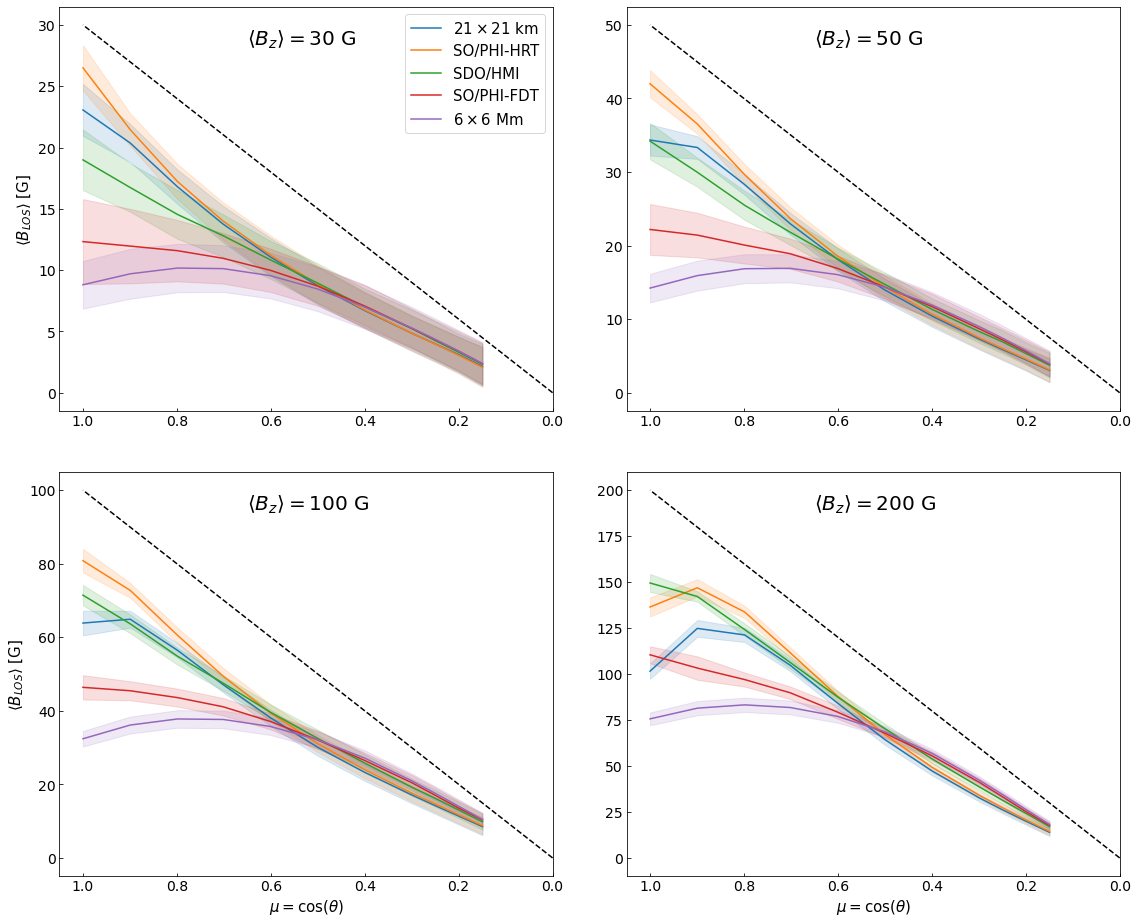

In [73]:
%matplotlib inline
#WFA

fig = plt.figure(figsize = (19,16))
gs = fig.add_gridspec(2, 2, wspace=0.15, hspace=0.15, height_ratios = [1,1])

ax_30 = fig.add_subplot(gs[0, 0])
plot_blos_curves(ax_30, plot_WFA_diff_MURaM_30, plot_WFA_diff_fdt_30, plot_WFA_diff_hrt_30, plot_WFA_diff_hmi_30, plot_WFA_diff_one_30,\
                 field_strength = '30', xlabel = None, ylabel = True, mu_lim=11, shaded_err = True, plt_legend=True)
y = 0.9*ax_30.get_ylim()[1]
ax_30.text(0.65,y,r"$\langle B_z \rangle = 30$ G", fontsize=20)

ax_50 = fig.add_subplot(gs[0, 1])
plot_blos_curves(ax_50, plot_WFA_diff_MURaM_50, plot_WFA_diff_fdt_50, plot_WFA_diff_hrt_50, plot_WFA_diff_hmi_50, plot_WFA_diff_one_50, field_strength = '50', xlabel = None, ylabel = None, mu_lim=11, shaded_err = True)
y = 0.9*ax_50.get_ylim()[1]
ax_50.text(0.65,y,r"$\langle B_z \rangle = 50$ G", fontsize=20)

ax_100 = fig.add_subplot(gs[1, 0])
plot_blos_curves(ax_100, plot_WFA_diff_MURaM_100, plot_WFA_diff_fdt_100, plot_WFA_diff_hrt_100, plot_WFA_diff_hmi_100, plot_WFA_diff_one_100, field_strength = '100', xlabel = True, ylabel = True, mu_lim=11, shaded_err = True)
y = 0.9*ax_100.get_ylim()[1]
ax_100.text(0.65,y,r"$\langle B_z \rangle = 100$ G", fontsize=20)

# ax_120 = fig.add_subplot(gs[1, 1])
# plot_blos_curves(ax_120, plot_WFA_diff_MURaM_120, plot_WFA_diff_fdt_120, plot_WFA_diff_hrt_120, plot_WFA_diff_hmi_120, plot_WFA_diff_one_120, field_strength = '120', xlabel = True, ylabel = True)
# y = 0.9*ax_120.get_ylim()[1]
# ax_120.text(0.65,y,r"$\langle B_z \rangle = 120$ G", fontsize=20)

ax_200 = fig.add_subplot(gs[1, 1])
plot_blos_curves(ax_200, plot_WFA_diff_MURaM_200, plot_WFA_diff_fdt_200, plot_WFA_diff_hrt_200, plot_WFA_diff_hmi_200, plot_WFA_diff_one_200, field_strength = '200', xlabel = True, ylabel = None, mu_lim=11, shaded_err = True)
y = 0.9*ax_200.get_ylim()[1]
ax_200.text(0.65,y,r"$\langle B_z \rangle = 200$ G", fontsize=20)

plt.tight_layout()
plt.savefig('./plots/wfa_diff_clv_blos.png', dpi=300, bbox_inches='tight', transparent=False)
plt.show()

(5, 2, 13)
(5, 2, 13)
(5, 2, 13)
(5, 2, 13)
(5, 2, 13)
(5, 2, 13)
(5, 2, 13)
(5, 2, 13)


/home/sinjan/.conda/envs/dataproc/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


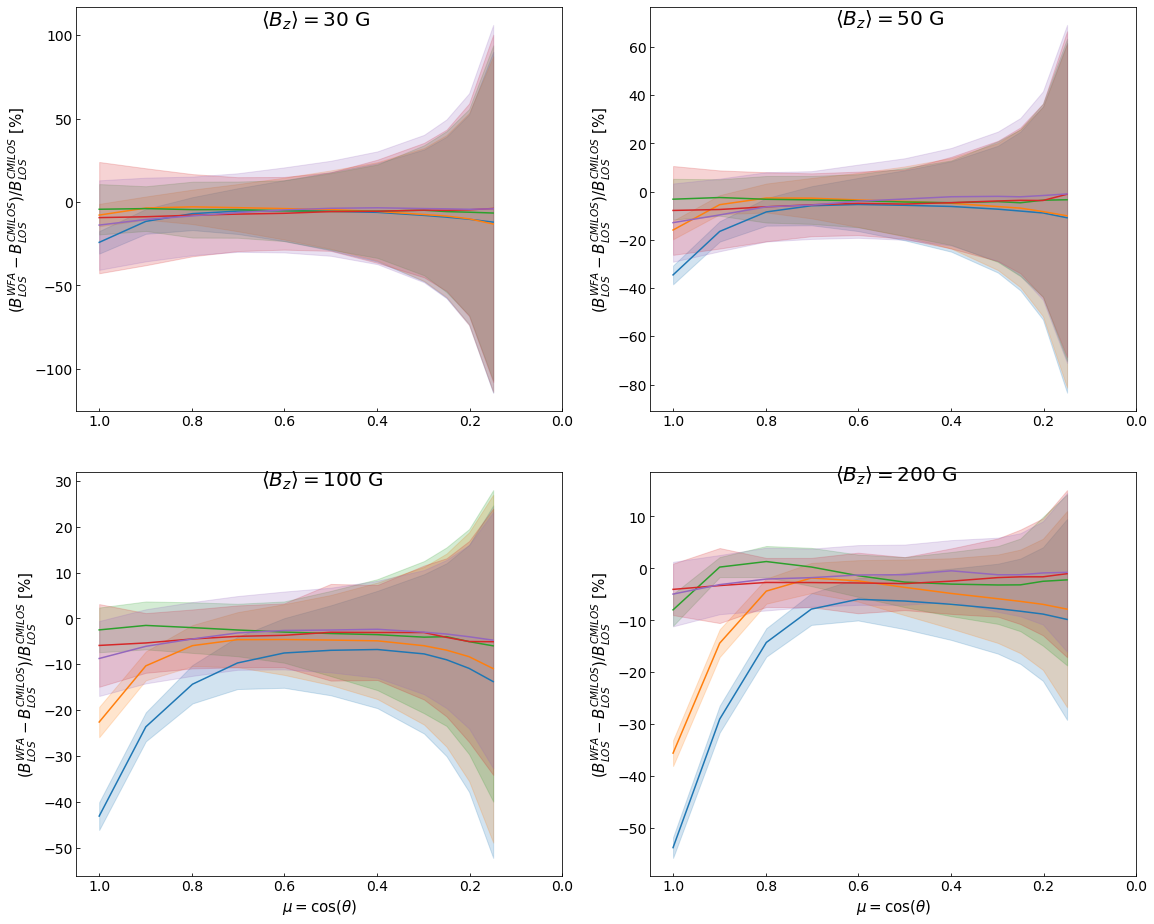

In [98]:
%matplotlib inline

fig = plt.figure(figsize = (19,16))
gs = fig.add_gridspec(2, 2, wspace=0.18, hspace=0.15, height_ratios = [1,1])

ax_30 = fig.add_subplot(gs[0, 0])
plot_blos_diff_curves(ax_30, [plot_MURaM_30, plot_fdt_30, plot_hrt_30, plot_hmi_30, plot_one_30], [plot_WFA_diff_MURaM_30, plot_WFA_diff_fdt_30, plot_WFA_diff_hrt_30, plot_WFA_diff_hmi_30, plot_WFA_diff_one_30], field_strength = '30', xlabel = None, ylabel = r"$(B_{LOS}^{WFA}-B_{LOS}^{CMILOS})/B_{LOS}^{CMILOS}$ [%]", errorbar=False, percent=True)
y = 0.9*ax_30.get_ylim()[1]
ax_30.text(0.65,y,r"$\langle B_z \rangle = 30$ G", fontsize=20)

ax_50 = fig.add_subplot(gs[0, 1])
plot_blos_diff_curves(ax_50, [plot_MURaM_50, plot_fdt_50, plot_hrt_50, plot_hmi_50, plot_one_50], [plot_WFA_diff_MURaM_50, plot_WFA_diff_fdt_50, plot_WFA_diff_hrt_50, plot_WFA_diff_hmi_50, plot_WFA_diff_one_50], field_strength = '50', xlabel = None, ylabel = r"$(B_{LOS}^{WFA}-B_{LOS}^{CMILOS})/B_{LOS}^{CMILOS}$ [%]", errorbar=False, percent=True)
y = 0.9*ax_50.get_ylim()[1]
ax_50.text(0.65,y,r"$\langle B_z \rangle = 50$ G", fontsize=20)

ax_100 = fig.add_subplot(gs[1, 0])
plot_blos_diff_curves(ax_100, [plot_MURaM_100, plot_fdt_100, plot_hrt_100, plot_hmi_100, plot_one_100], [plot_WFA_diff_MURaM_100, plot_WFA_diff_fdt_100, plot_WFA_diff_hrt_100, plot_WFA_diff_hmi_100, plot_WFA_diff_one_100], field_strength = '100', xlabel = True, ylabel = r"$(B_{LOS}^{WFA}-B_{LOS}^{CMILOS})/B_{LOS}^{CMILOS}$ [%]", errorbar=False, percent=True)
y = 0.9*ax_100.get_ylim()[1]
ax_100.text(0.65,y,r"$\langle B_z \rangle = 100$ G", fontsize=20)

ax_200 = fig.add_subplot(gs[1, 1])
plot_blos_diff_curves(ax_200, [plot_MURaM_200, plot_fdt_200, plot_hrt_200, plot_hmi_200, plot_one_200], [plot_WFA_diff_MURaM_200, plot_WFA_diff_fdt_200, plot_WFA_diff_hrt_200, plot_WFA_diff_hmi_200, plot_WFA_diff_one_200], field_strength = '200', xlabel = True, ylabel = r"$(B_{LOS}^{WFA}-B_{LOS}^{CMILOS})/B_{LOS}^{CMILOS}$ [%]", errorbar=False, percent=True)
y = 0.9*ax_200.get_ylim()[1]
ax_200.text(0.65,y,r"$\langle B_z \rangle = 200$ G", fontsize=20)

plt.tight_layout()
plt.show()

(5, 2, 13)
(5, 2, 13)
(5, 2, 13)
(5, 2, 13)
(5, 2, 13)
(5, 2, 13)
(5, 2, 13)
(5, 2, 13)


/home/sinjan/.conda/envs/dataproc/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


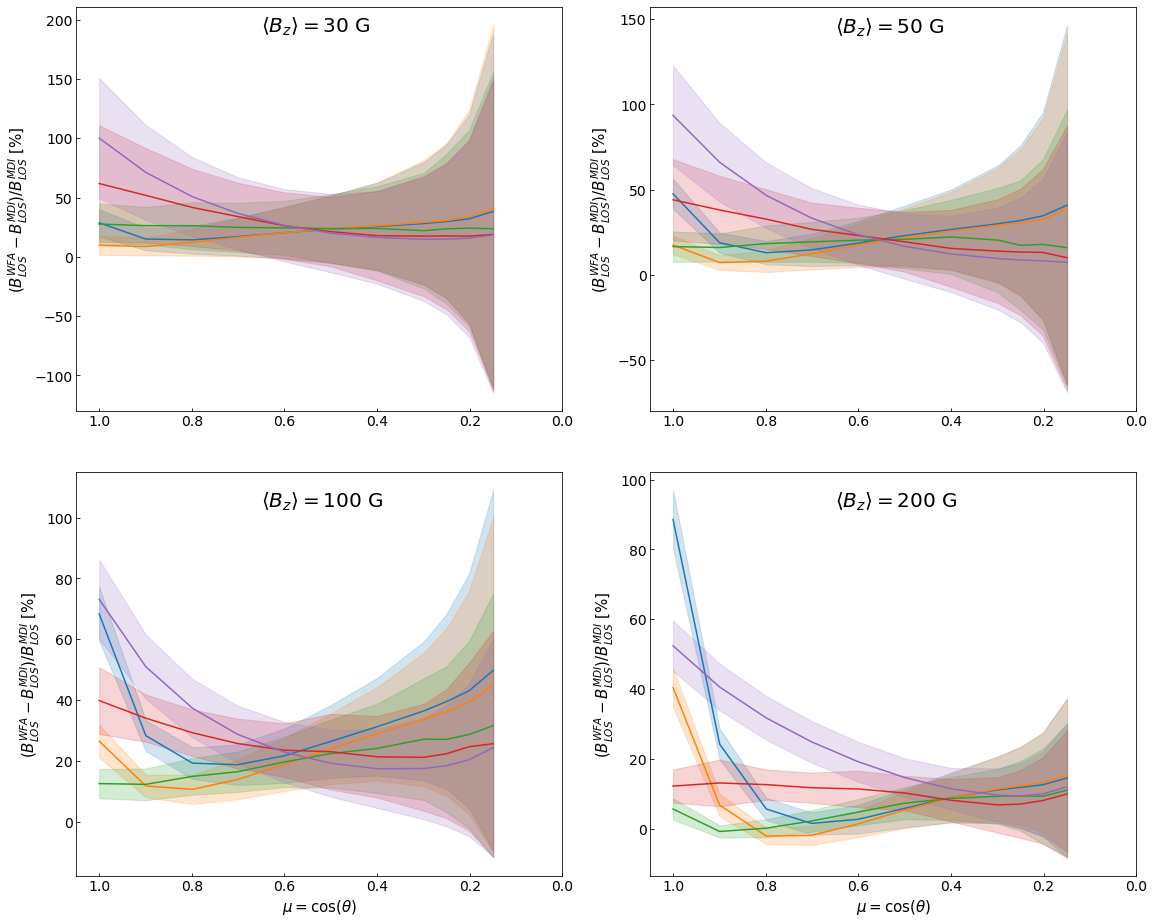

In [99]:
%matplotlib inline

fig = plt.figure(figsize = (19,16))
gs = fig.add_gridspec(2, 2, wspace=0.18, hspace=0.15, height_ratios = [1,1])

ax_30 = fig.add_subplot(gs[0, 0])
plot_blos_diff_curves(ax_30, [plot_WFA_diff_MURaM_30, plot_WFA_diff_fdt_30, plot_WFA_diff_hrt_30, plot_WFA_diff_hmi_30, plot_WFA_diff_one_30], [plot_MDI_MURaM_30, plot_MDI_fdt_30, plot_MDI_hrt_30, plot_MDI_hmi_30, plot_MDI_one_30], field_strength = '30', xlabel = None, ylabel = r"$(B_{LOS}^{WFA}-B_{LOS}^{MDI})/B_{LOS}^{MDI}$ [%]", errorbar=False, percent=True)
y = 0.9*ax_30.get_ylim()[1]
ax_30.text(0.65,y,r"$\langle B_z \rangle = 30$ G", fontsize=20)

ax_50 = fig.add_subplot(gs[0, 1])
plot_blos_diff_curves(ax_50, [plot_WFA_diff_MURaM_50, plot_WFA_diff_fdt_50, plot_WFA_diff_hrt_50, plot_WFA_diff_hmi_50, plot_WFA_diff_one_50], [plot_MDI_MURaM_50, plot_MDI_fdt_50, plot_MDI_hrt_50, plot_MDI_hmi_50, plot_MDI_one_50], field_strength = '50', xlabel = None, ylabel = r"$(B_{LOS}^{WFA}-B_{LOS}^{MDI})/B_{LOS}^{MDI}$ [%]", errorbar=False, percent=True)
y = 0.9*ax_50.get_ylim()[1]
ax_50.text(0.65,y,r"$\langle B_z \rangle = 50$ G", fontsize=20)

ax_100 = fig.add_subplot(gs[1, 0])
plot_blos_diff_curves(ax_100, [plot_WFA_diff_MURaM_100, plot_WFA_diff_fdt_100, plot_WFA_diff_hrt_100, plot_WFA_diff_hmi_100, plot_WFA_diff_one_100], [plot_MDI_MURaM_100, plot_MDI_fdt_100, plot_MDI_hrt_100, plot_MDI_hmi_100, plot_MDI_one_100], field_strength = '100', xlabel = True, ylabel = r"$(B_{LOS}^{WFA}-B_{LOS}^{MDI})/B_{LOS}^{MDI}$ [%]", errorbar=False, percent=True)
y = 0.9*ax_100.get_ylim()[1]
ax_100.text(0.65,y,r"$\langle B_z \rangle = 100$ G", fontsize=20)

ax_200 = fig.add_subplot(gs[1, 1])
plot_blos_diff_curves(ax_200, [plot_WFA_MURaM_200, plot_WFA_fdt_200, plot_WFA_hrt_200, plot_WFA_hmi_200, plot_WFA_diff_one_200], [plot_MDI_MURaM_200, plot_MDI_fdt_200, plot_MDI_hrt_200, plot_MDI_hmi_200, plot_MDI_one_200], field_strength = '200', xlabel = True, ylabel = r"$(B_{LOS}^{WFA}-B_{LOS}^{MDI})/B_{LOS}^{MDI}$ [%]", errorbar=False, percent=True)
y = 0.9*ax_200.get_ylim()[1]
ax_200.text(0.65,y,r"$\langle B_z \rangle = 200$ G", fontsize=20)

plt.tight_layout()
plt.show()

/home/sinjan/.conda/envs/dataproc/lib/python3.7/site-packages/ipykernel_launcher.py:40: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


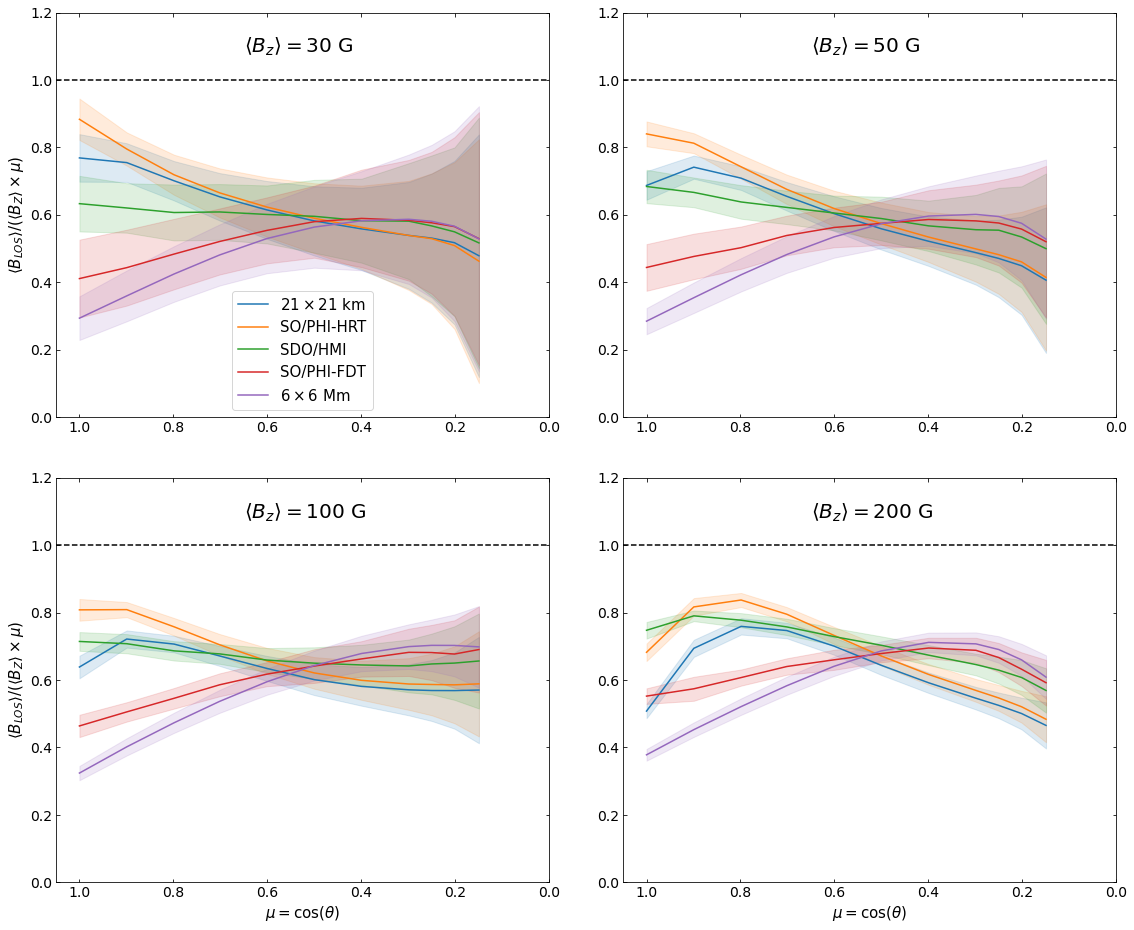

In [94]:
%matplotlib inline
#WFA

fig = plt.figure(figsize = (19,16))
gs = fig.add_gridspec(2, 2, wspace=0.15, hspace=0.15, height_ratios = [1,1])

ax_30 = fig.add_subplot(gs[0, 0])
plot_blos_curves(ax_30, plot_WFA_diff_MURaM_30, plot_WFA_diff_fdt_30, plot_WFA_diff_hrt_30, plot_WFA_diff_hmi_30, plot_WFA_diff_one_30,\
                 field_strength = '30', xlabel = None, ylabel = True, mu_lim=11, shaded_err = True, plt_legend=True, div_by_exp=True)
y = 0.9*ax_30.get_ylim()[1]
ax_30.tick_params(top=True, bottom=True, left=True, right=True, labeltop=False, labelbottom=True, direction="in")
ax_30.text(0.65,y,r"$\langle B_z \rangle = 30$ G", fontsize=20)

ax_50 = fig.add_subplot(gs[0, 1])
plot_blos_curves(ax_50, plot_WFA_diff_MURaM_50, plot_WFA_diff_fdt_50, plot_WFA_diff_hrt_50, plot_WFA_diff_hmi_50, plot_WFA_diff_one_50, \
                 field_strength = '50', xlabel = None, ylabel = None, mu_lim=11, shaded_err = True, div_by_exp=True)
y = 0.9*ax_50.get_ylim()[1]
ax_50.tick_params(top=True, bottom=True, left=True, right=True, labeltop=False, labelbottom=True, direction="in")
ax_50.text(0.65,y,r"$\langle B_z \rangle = 50$ G", fontsize=20)

ax_100 = fig.add_subplot(gs[1, 0])
plot_blos_curves(ax_100, plot_WFA_diff_MURaM_100, plot_WFA_diff_fdt_100, plot_WFA_diff_hrt_100, plot_WFA_diff_hmi_100, plot_WFA_diff_one_100, \
                 field_strength = '100', xlabel = True, ylabel = True, mu_lim=11, shaded_err = True, div_by_exp=True)
y = 0.9*ax_100.get_ylim()[1]
ax_100.tick_params(top=True, bottom=True, left=True, right=True, labeltop=False, labelbottom=True, direction="in")
ax_100.text(0.65,y,r"$\langle B_z \rangle = 100$ G", fontsize=20)

# ax_120 = fig.add_subplot(gs[1, 1])
# plot_blos_curves(ax_120, plot_WFA_diff_MURaM_120, plot_WFA_diff_fdt_120, plot_WFA_diff_hrt_120, plot_WFA_diff_hmi_120, plot_WFA_diff_one_120, field_strength = '120', xlabel = True, ylabel = True)
# y = 0.9*ax_120.get_ylim()[1]
# ax_120.text(0.65,y,r"$\langle B_z \rangle = 120$ G", fontsize=20)

ax_200 = fig.add_subplot(gs[1, 1])
plot_blos_curves(ax_200, plot_WFA_diff_MURaM_200, plot_WFA_diff_fdt_200, plot_WFA_diff_hrt_200, plot_WFA_diff_hmi_200, plot_WFA_diff_one_200, \
                 field_strength = '200', xlabel = True, ylabel = None, mu_lim=11, shaded_err = True, div_by_exp=True)
y = 0.9*ax_200.get_ylim()[1]
ax_200.tick_params(top=True, bottom=True, left=True, right=True, labeltop=False, labelbottom=True, direction="in")
ax_200.text(0.65,y,r"$\langle B_z \rangle = 200$ G", fontsize=20)

plt.tight_layout()
plt.savefig('./plots/wfa_diff_clv_blos_frac_5250_ticks.png', dpi=300, bbox_inches='tight', transparent=False)
plt.show()